This one has scans over large range params, with DMASS=2 for h1 and h2, wiht assignMass = 2 instead of 1 to fix HS assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, MultipleLocator
from collections import namedtuple

%matplotlib inline

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")

mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.scatterpoints'] = 1
# mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_columns', 200)

In [127]:
from common_plots import *

In [85]:
# Extract dataframes from binary
store = pd.HDFStore("points_500_MICRO_SCAN_NTv491_HBv431_HSv140_largeRange_DMass2_fixAssignMass_19_May_16_1513.h5")
print store

/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/tables/leaf.py:386: PerformanceWarning: The Leaf ``/full12loop_all/_i_table/constraints/sorted`` is exceeding the maximum recommended rowsize (104857600 bytes);
be ready to see PyTables asking for *lots* of memory and possibly slow
I/O.  You may want to reduce the rowsize by trimming the value of
dimensions that are orthogonal (and preferably close) to the *main*
dimension of this leave.  Alternatively, in case you have specified a
very small/large chunksize, you may want to increase/decrease it.
  PerformanceWarning)


<class 'pandas.io.pytables.HDFStore'>
File path: points_500_MICRO_SCAN_NTv491_HBv431_HSv140_largeRange_DMass2_fixAssignMass_19_May_16_1513.h5
/full12loop_all                                                                  frame_table  (typ->appendable,nrows->294132,ncols->440,indexers->[index],dc->[Bra1bb,Bra1cc,Bra1gg,Bra1mumu,Bra1ss,Bra1tautau,Brh1a1a1,Brh1a1z,Brh1bb,Brh1cc,Brh1gammagamma,Brh1gg,Brh1mumu,Brh1tautau,Brh1ww,Brh1zgamma,Brh1zz,Brh2a1a1,Brh2a1z,Brh2bb,Brh2gammagamma,Brh2gg,Brh2h1h1,Brh2tautau,Brh2ww,Brh2zgamma,Brh2zz,Del_a_mu,HBchannel,HBobsratio,HBresult,HS_10_chi2,HS_10_muPred,HS_11_chi2,HS_11_muPred,HS_12_chi2,HS_12_muPred,HS_13_chi2,HS_13_muPred,HS_14_chi2,HS_14_muPred,HS_15_chi2,HS_15_muPred,HS_16_chi2,HS_16_muPred,HS_17_chi2,HS_17_muPred,HS_18_chi2,HS_18_muPred,HS_19_chi2,HS_19_muPred,HS_1_chi2,HS_1_muPred,HS_20_chi2,HS_20_muPred,HS_21_chi2,HS_21_muPred,HS_22_chi2,HS_22_muPred,HS_23_chi2,HS_23_muPred,HS_24_chi2,HS_24_muPred,HS_25_chi2,HS_25_muPred,HS_26_chi2,HS_26_

In [86]:
df_orig = store.full12loop_all

In [3]:
df_pass_all = store.full12loop_good_posMuMagMom_planckUpperOnly_ignorebctaunu_ignorechi2 #'relaxed' constraints - +ve g-2 and omegah^2

In [4]:
store.close()

In [5]:
# Make subsets based on masses, and passing ALL NMSSMTools constraints (i.e. don't ignore g-2 and relic density)
from make_hdf5 import subset_var

In [6]:
df_pass_all_ma1 = subset_var(df_pass_all, 3.5, 10.5, 'ma1')

In [7]:
print 'relaxed constraints:', len(df_pass_all.index) 
print 'With ma1 < 10.5:', len(df_pass_all_ma1.index)


relaxed constraints: 22311
With ma1 < 10.5: 438


In [87]:
print 'Everything:', len(df_orig.index)

Everything: 294132


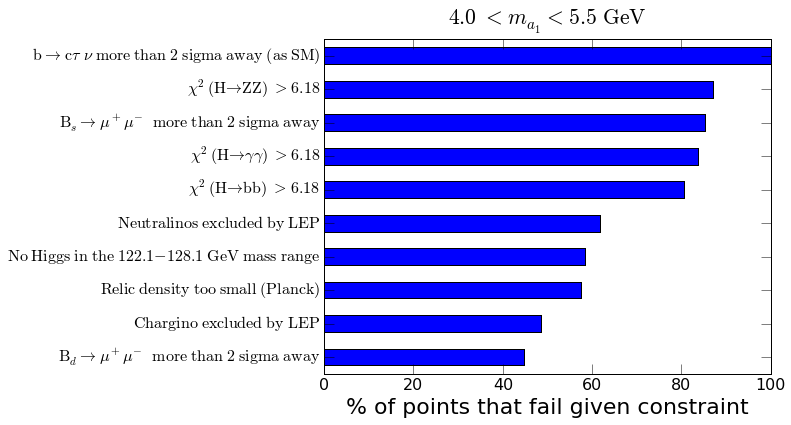

In [171]:
lower, upper = 4, 5.5
ax, data = plot_constraints(df_orig.query('%f < ma1 < %f' % (lower, upper)), 
                 r'$%.1f\ <\ m_{a_1} <\ %.1f\ \mathrm{GeV}$' % (lower, upper))

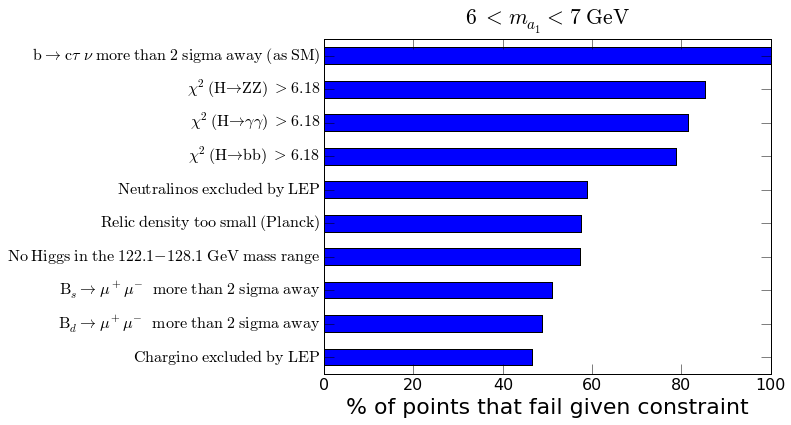

In [129]:
lower, upper = 6, 7
ax_side, data_side = plot_constraints(df_orig.query('%f < ma1 < %f' % (lower, upper)), 
                            r'$%d\ <\ m_{a_1} <\ %d\ \mathrm{GeV}$' % (lower, upper))

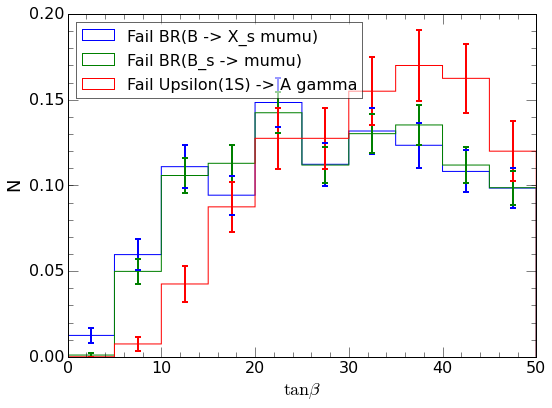

In [203]:
plot_histogram(df=df_orig[df_orig.constraints.str.contains("X_s")].query('4<ma1<5'), var='tgbeta', color='blue', 
               histtype='step', bins=10, range=[0,50], normed=True, label='Fail BR(B -> X_s mumu)')
plot_histogram(ax=plt.gca(), df=df_orig[df_orig.constraints.str.contains("B_s")].query('4<ma1<5'), var='tgbeta', color='green', 
               histtype='step', bins=10, range=[0,50], normed=True, label='Fail BR(B_s -> mumu)')
plot_histogram(ax=plt.gca(), df=df_orig[df_orig.constraints.str.contains("Upsilon")].query('4<ma1<5'), var='tgbeta', color='red', 
               histtype='step', bins=10, range=[0,50], normed=True, label='Fail Upsilon(1S) -> A gamma')
plt.legend(loc='best', fontsize=16)
plt.xlabel(r"$\tan\beta$")
# plt.ylabel("p.d.f")
plt.ylabel("N")

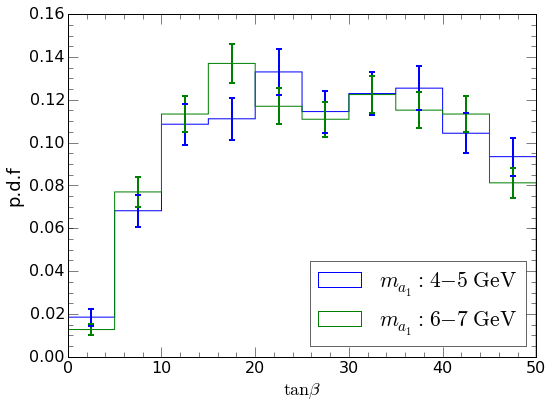

In [184]:
plot_histogram(df=df_orig.query('%d < ma1 < %d' % (4, 5)), var='tgbeta', color='blue', 
               histtype='step', bins=10, range=[0,50], normed=True, label=r'$m_{a_1}:\ 4-5 \mathrm{\ GeV}$')
plot_histogram(ax=plt.gca(), df=df_orig.query('%d < ma1 < %d' % (6, 7)), var='tgbeta', color='green', 
               histtype='step', bins=10, range=[0,50], normed=True, label=r'$m_{a_1}:\ 6-7 \mathrm{\ GeV}$')
plt.legend(loc='lower right')
plt.xlabel(r"$\tan\beta$")
plt.ylabel("p.d.f")

In [172]:
col_names = ['4-5.5', '6-7']
df_compare_fail = pd.concat({col_names[0]: data, col_names[1]: data_side}, axis=1).dropna()
df_compare_fail['Difference'] = df_compare_fail[col_names[0]] - df_compare_fail[col_names[1]]

In [173]:
df_compare_fail.sort_values(by='Difference', ascending=False)[:5]

4-5.5  \
$\mathrm{Excluded\ by\ BR(B\ }\to\mathrm{\ X}_{s}\mathrm{\ }\mu^+\mu^-\mathrm{)}$               40.044004   
$\mathrm{B}_{s}\mathrm{\ }\to\mathrm{\ }\mu^+\mu^-\mathrm{\ more\ than\ 2\ sigma\ away}$        85.368537   
$\mathrm{Excluded\ by\ Upsilon(1S)\ }\to\mathrm{\ A\ }\gamma\mathrm{\ (CLEO)}$                  30.968097   
$\mathrm{}\Delta\mathrm{\ M}_{s}\mathrm{\ more\ than\ 2\ sigma\ away}$                          14.851485   
$\mathrm{Excluded\ by\ ee\ }\to\mathrm{\ hZ\ h\ }\to\mathrm{\ AAA\ }\to\mathrm{\ light\ pair}$  17.986799   

                                                                                                      6-7  \
$\mathrm{Excluded\ by\ BR(B\ }\to\mathrm{\ X}_{s}\mathrm{\ }\mu^+\mu^-\mathrm{)}$                1.090909   
$\mathrm{B}_{s}\mathrm{\ }\to\mathrm{\ }\mu^+\mu^-\mathrm{\ more\ than\ 2\ sigma\ away}$        51.090909   
$\mathrm{Excluded\ by\ Upsilon(1S)\ }\to\mathrm{\ A\ }\gamma\mathrm{\ (CLEO)}$                  17.030303   
$\mathrm{}\Delta\mathrm{\ M}_{s}\mathrm{\ more\ than\ 2\ sigma\ away}$                           2.181818   
$\mathrm{Excluded\ by\ ee\ }\to\mathrm{\ hZ\ h\ }\to\mathrm{\ AAA\ }\to\mathrm{\ light\ pair}$  14.787879   

                                                                                                Difference  
$\mathrm{Excluded\ by\ BR(B\ }\to\mathrm{\ X}_{s}\mathrm{\ }\mu^+\mu^-\mathrm{)}$                38.953095  
$\mathrm{B}_{s}\mathrm{\ }\to\mathrm{\ }\mu^+\mu^-\mathrm{\ more\ than\ 2\ sigma\ away}$         34.277628  
$\mathrm{Excluded\ by\ Upsilon(1S)\ }\to\mathrm{\ A\ }\gamma\mathrm{\ (CLEO)}$                   13.937794  
$\mathrm{}\Delta\mathrm{\ M}_{s}\mathrm{\ more\ than\ 2\ sigma\ away}$                           12.669667  
$\mathrm{Excluded\ by\ ee\ }\to\mathrm{\ hZ\ h\ }\to\mathrm{\ AAA\ }\to\mathrm{\ light\ pair}$    3.198920

In [166]:
print df_compare_fail.sort_values(by='Difference', ascending=False)[:5].to_latex(float_format=lambda x: "%.1f"%x)

\begin{tabular}{lrrr}
\toprule
{} &  4-5 &  6-7 &  Difference \\
\midrule
\$\textbackslashmathrm\{Excluded\textbackslash by\textbackslash BR(B\textbackslash \}\textbackslashto\textbackslashmathrm\{\textbackslash X\}\_\{s\}\textbackslashmathrm\{\textbackslash \}\textbackslashmu\textasciicircum+\textbackslashmu\textasciicircum-\textbackslashmathrm\{)\}\$              & 60.7 &  1.1 &        59.6 \\
\$\textbackslashmathrm\{B\}\_\{s\}\textbackslashmathrm\{\textbackslash \}\textbackslashto\textbackslashmathrm\{\textbackslash \}\textbackslashmu\textasciicircum+\textbackslashmu\textasciicircum-\textbackslashmathrm\{\textbackslash more\textbackslash than\textbackslash 2\textbackslash sigma\textbackslash away\}\$       & 82.7 & 51.1 &        31.7 \\
\$\textbackslashmathrm\{Excluded\textbackslash by\textbackslash Upsilon(1S)\textbackslash \}\textbackslashto\textbackslashmathrm\{\textbackslash A\textbackslash \}\textbackslashgamma\textbackslashmathrm\{\textbackslash (CLEO)\}\$                 & 33

/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


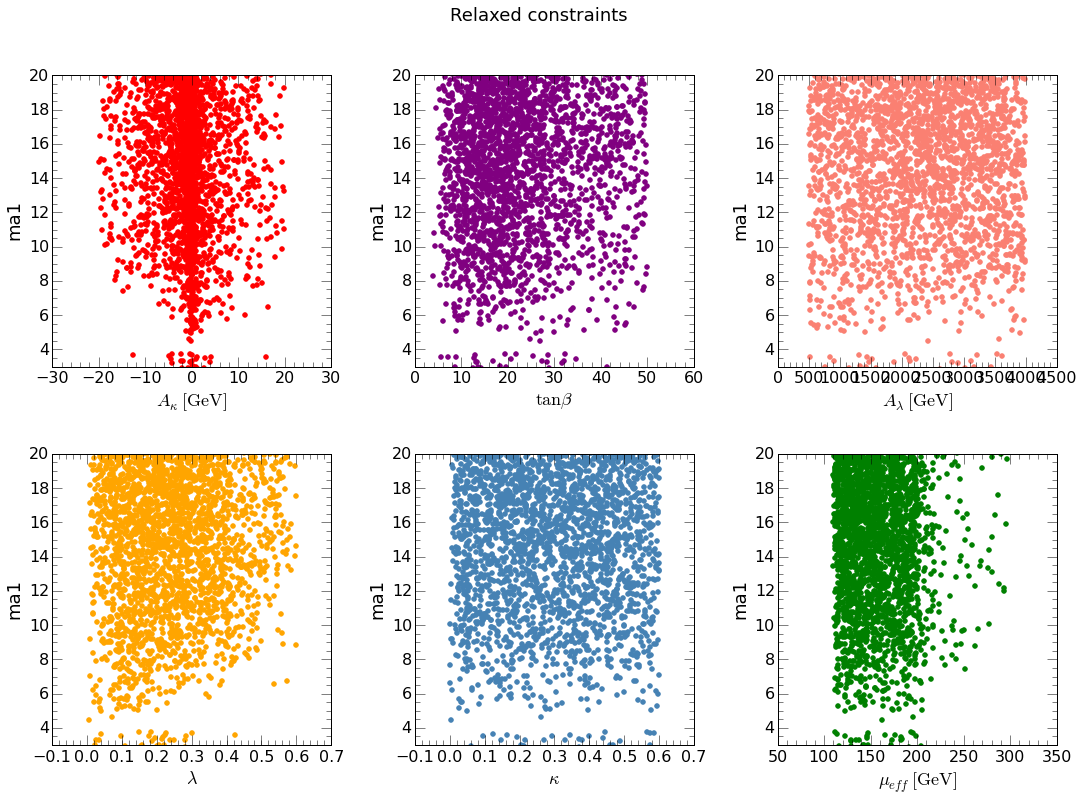

In [8]:
plot_input_params_scatters(df_pass_all, 'ma1', 'ma1', yrange=[3, 20], title='Relaxed constraints')

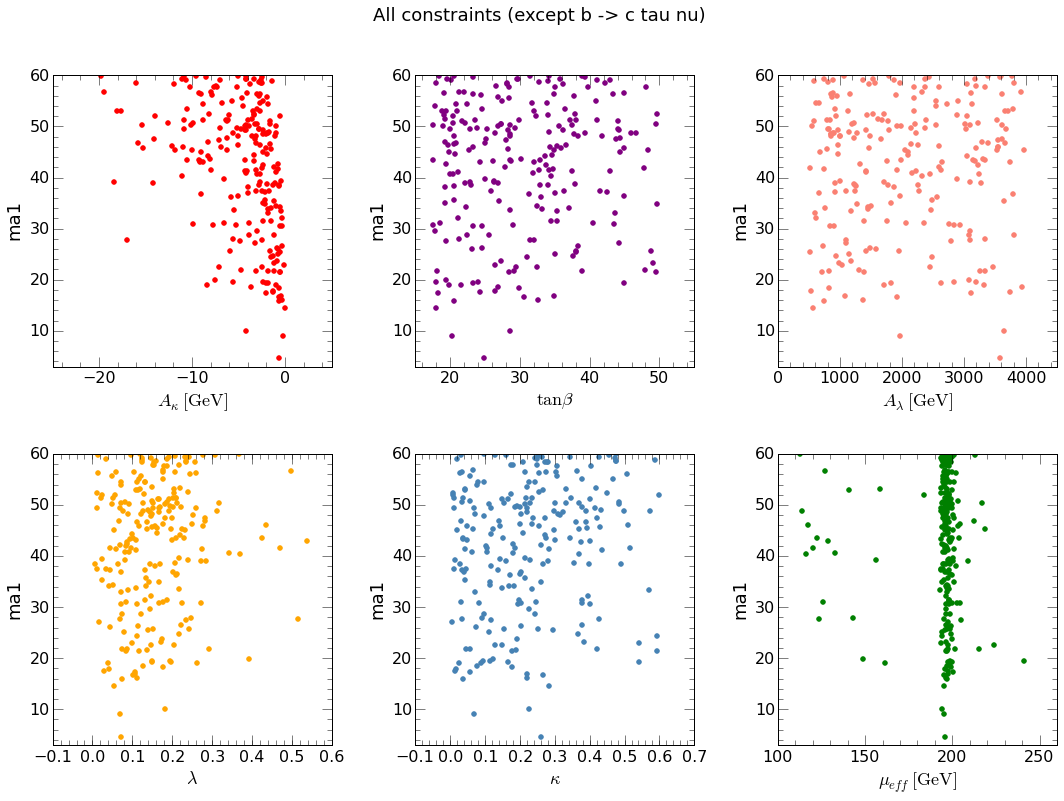

In [84]:
plot_input_params_scatters(df_pass_all[df_pass_all.constraints == 'b -> c tau nu more than 2 sigma away (as SM)'], 
                           'ma1', 'ma1', yrange=[3, 60], title='All constraints (except b -> c tau nu)')

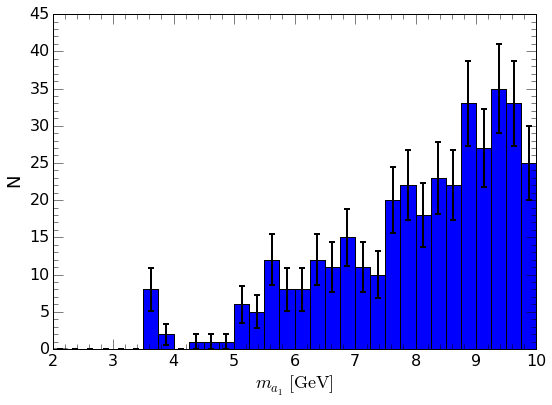

In [10]:
_ = plot_histogram(df=df_pass_all_ma1, var='ma1', range=[2, 10], bins=32, xlabel=r'$m_{a_1}\mathrm{\ [GeV]}$')

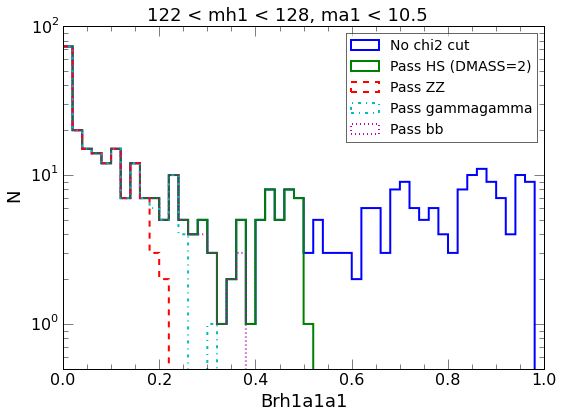

In [11]:
errbars = False
query_str = '122<mh1<128'
nbins = 50
_ = plot_histogram(df=df_pass_all_ma1.query(query_str), 
                   var='Brh1a1a1', bins=nbins, range=[0,1], histtype='step', errorbars=errbars, label='No chi2 cut', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                   var='Brh1a1a1', bins=nbins, range=[0,1], histtype='step', errorbars=errbars, label='Pass HS (DMASS=2)', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), 
                   var='Brh1a1a1', bins=nbins, range=[0,1], histtype='step', errorbars=errbars, label='Pass ZZ', linestyle='dashed', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), 
                   var='Brh1a1a1', bins=nbins, range=[0,1], histtype='step', errorbars=errbars, label='Pass gammagamma', linestyle='dashdot', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), 
                   var='Brh1a1a1', bins=nbins, range=[0,1], histtype='step', errorbars=errbars, label='Pass bb', linestyle='dotted', linewidth=2)

plt.legend(loc=0, fontsize=14)
plt.yscale('log')
plt.ylim(0.5, 100)
plt.suptitle('122 < mh1 < 128, ma1 < 10.5')

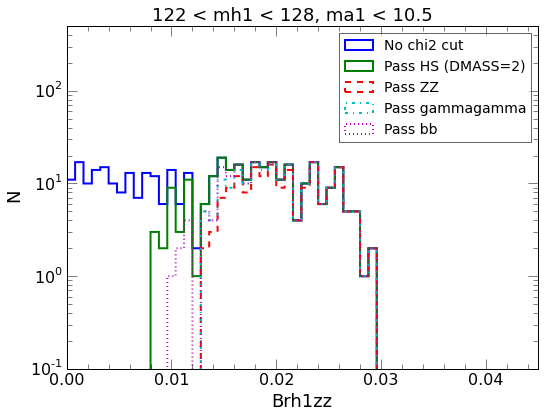

In [12]:
errbars = False
query_str = '122<mh1<128'
nbins = 50
x_range = [0, 0.04]
_ = plot_histogram(df=df_pass_all_ma1.query(query_str), 
                   var='Brh1zz', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='No chi2 cut', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                   var='Brh1zz', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass HS (DMASS=2)', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), 
                   var='Brh1zz', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass ZZ', linestyle='dashed', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), 
                   var='Brh1zz', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass gammagamma', linestyle='dashdot', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), 
                   var='Brh1zz', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass bb', linestyle='dotted', linewidth=2)

plt.legend(loc=0, fontsize=14)
plt.yscale('log')
plt.ylim(0.1, 500)
# plt.xlim(0, 0.4)
plt.suptitle('122 < mh1 < 128, ma1 < 10.5')
set_major_tick_interval('X', 0.01)

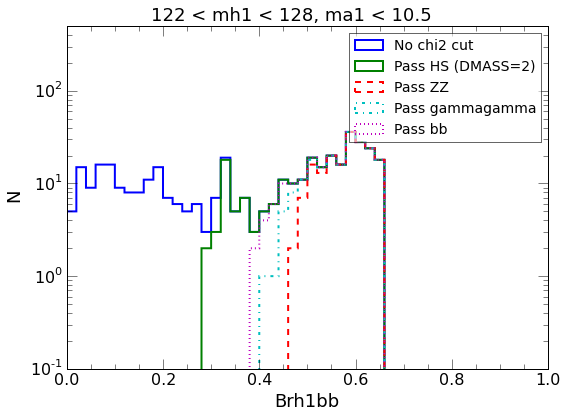

In [13]:
errbars = False
query_str = '122<mh1<128'
nbins = 50
x_range = [0, 1]
_ = plot_histogram(df=df_pass_all_ma1.query(query_str), 
                   var='Brh1bb', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='No chi2 cut', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                   var='Brh1bb', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass HS (DMASS=2)', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), 
                   var='Brh1bb', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass ZZ', linestyle='dashed', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), 
                   var='Brh1bb', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass gammagamma', linestyle='dashdot', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), 
                   var='Brh1bb', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass bb', linestyle='dotted', linewidth=2)

plt.legend(loc=0, fontsize=14)
plt.yscale('log')
plt.ylim(0.1, 500)
# plt.xlim(0, 0.4)
plt.suptitle('122 < mh1 < 128, ma1 < 10.5')

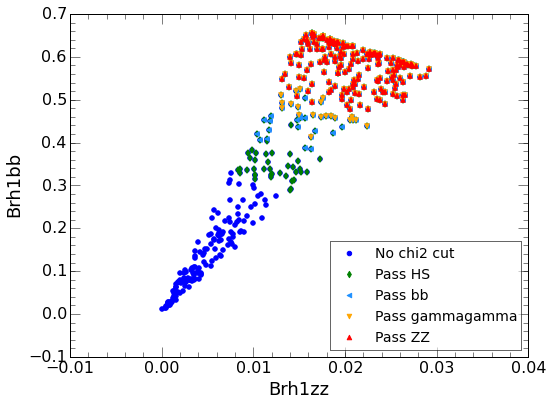

In [14]:
query = '122<mh1<128'
x_var = 'Brh1zz'
y_var = 'Brh1bb'
plot_scatter(df=df_pass_all_ma1.query(query_str), xvar=x_var, yvar=y_var, 
             color='blue', marker='o', label='No chi2 cut')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), xvar=x_var, yvar=y_var, 
             color='green', marker='d', label='Pass HS')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), xvar=x_var, yvar=y_var, 
             color='dodgerblue', marker='<', label='Pass bb')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), xvar=x_var, yvar=y_var, 
             color='orange', marker='v', label='Pass gammagamma')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), xvar=x_var, yvar=y_var, 
             color='red', marker='^', label='Pass ZZ')
plt.legend(loc='lower right', fontsize=14)

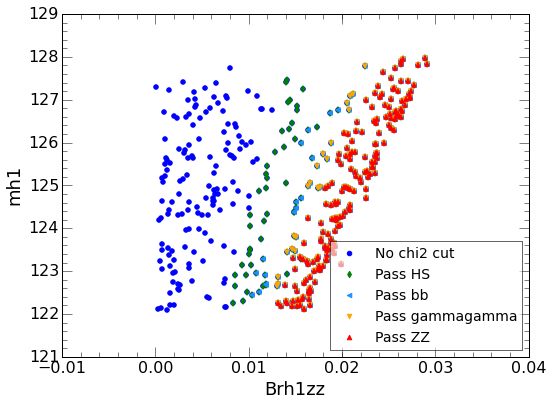

In [15]:
query = '122<mh1<128'
x_var = 'Brh1zz'
y_var = 'mh1'
plot_scatter(df=df_pass_all_ma1.query(query_str), xvar=x_var, yvar=y_var, 
             color='blue', marker='o', label='No chi2 cut')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), xvar=x_var, yvar=y_var, 
             color='green', marker='d', label='Pass HS')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), xvar=x_var, yvar=y_var, 
             color='dodgerblue', marker='<', label='Pass bb')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), xvar=x_var, yvar=y_var, 
             color='orange', marker='v', label='Pass gammagamma')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), xvar=x_var, yvar=y_var, 
             color='red', marker='^', label='Pass ZZ')
plt.legend(loc='lower right', fontsize=14)

(0, 0.03)

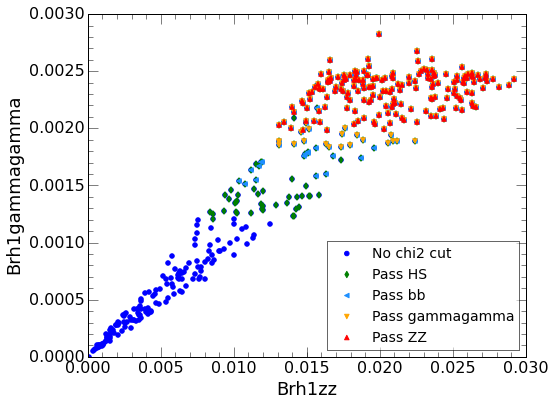

In [16]:
query = '122<mh1<128'
x_var = 'Brh1zz'
y_var = 'Brh1gammagamma'
plot_scatter(df=df_pass_all_ma1.query(query_str), xvar=x_var, yvar=y_var, 
             color='blue', marker='o', label='No chi2 cut')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), xvar=x_var, yvar=y_var, 
             color='green', marker='d', label='Pass HS')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), xvar=x_var, yvar=y_var, 
             color='dodgerblue', marker='<', label='Pass bb')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), xvar=x_var, yvar=y_var, 
             color='orange', marker='v', label='Pass gammagamma')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), xvar=x_var, yvar=y_var, 
             color='red', marker='^', label='Pass ZZ')
plt.legend(loc='lower right', fontsize=14)
plt.ylim(0, 0.003)
plt.xlim(0, 0.03)

(0, 0.03)

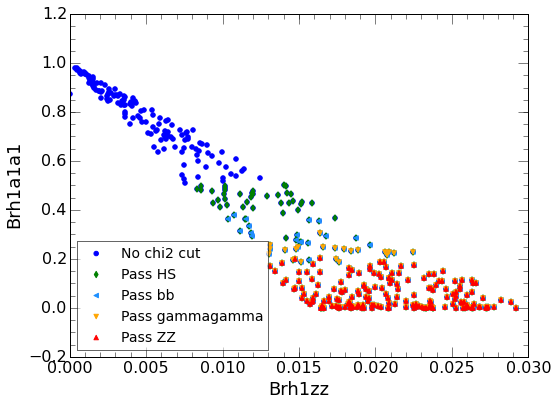

In [17]:
query = '122<mh1<128'
x_var = 'Brh1zz'
y_var = 'Brh1a1a1'
plot_scatter(df=df_pass_all_ma1.query(query_str), xvar=x_var, yvar=y_var, 
             color='blue', marker='o', label='No chi2 cut')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), xvar=x_var, yvar=y_var, 
             color='green', marker='d', label='Pass HS')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), xvar=x_var, yvar=y_var, 
             color='dodgerblue', marker='<', label='Pass bb')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), xvar=x_var, yvar=y_var, 
             color='orange', marker='v', label='Pass gammagamma')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), xvar=x_var, yvar=y_var, 
             color='red', marker='^', label='Pass ZZ')
plt.legend(loc='lower left', fontsize=14)
# plt.ylim(0, 0.003)
plt.xlim(0, 0.03)

(0, 0.003)

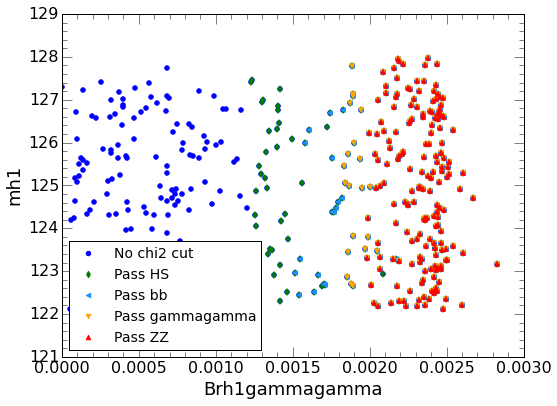

In [18]:
query = '122<mh1<128'
x_var = 'Brh1gammagamma'
y_var = 'mh1'
plot_scatter(df=df_pass_all_ma1.query(query_str), xvar=x_var, yvar=y_var, 
             color='blue', marker='o', label='No chi2 cut')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), xvar=x_var, yvar=y_var, 
             color='green', marker='d', label='Pass HS')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), xvar=x_var, yvar=y_var, 
             color='dodgerblue', marker='<', label='Pass bb')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), xvar=x_var, yvar=y_var, 
             color='orange', marker='v', label='Pass gammagamma')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), xvar=x_var, yvar=y_var, 
             color='red', marker='^', label='Pass ZZ')
plt.legend(loc='lower left', fontsize=14, framealpha=1)
plt.xlim(0, 0.003)
# plt.xlim(0, 0.03)

(0, 0.003)

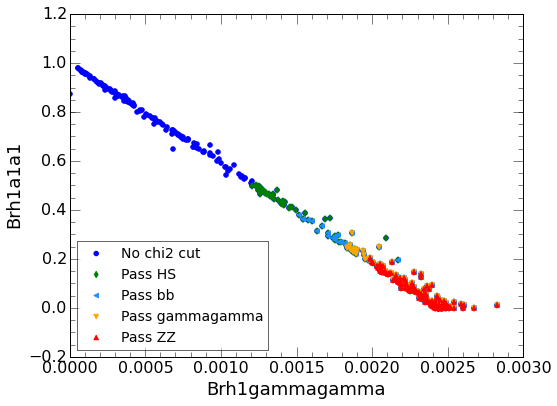

In [19]:
query = '122<mh1<128'
x_var = 'Brh1gammagamma'
y_var = 'Brh1a1a1'
plot_scatter(df=df_pass_all_ma1.query(query_str), xvar=x_var, yvar=y_var, 
             color='blue', marker='o', label='No chi2 cut')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), xvar=x_var, yvar=y_var, 
             color='green', marker='d', label='Pass HS')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), xvar=x_var, yvar=y_var, 
             color='dodgerblue', marker='<', label='Pass bb')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), xvar=x_var, yvar=y_var, 
             color='orange', marker='v', label='Pass gammagamma')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), xvar=x_var, yvar=y_var, 
             color='red', marker='^', label='Pass ZZ')
plt.legend(loc='lower left', fontsize=14)
plt.xlim(0, 0.003)
# plt.xlim(0, 0.03)

(0, 0.7)

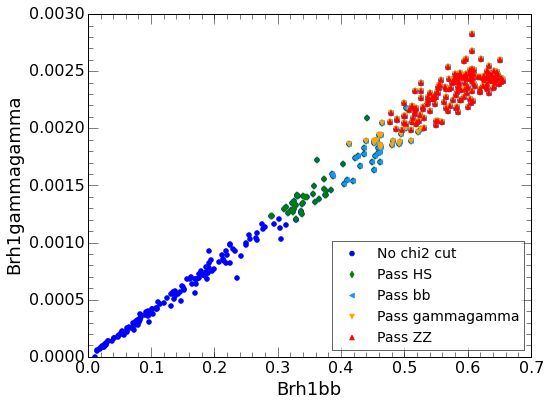

In [20]:
query = '122<mh1<128'
x_var = 'Brh1bb'
y_var = 'Brh1gammagamma'
plot_scatter(df=df_pass_all_ma1.query(query_str), xvar=x_var, yvar=y_var, 
             color='blue', marker='o', label='No chi2 cut')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), xvar=x_var, yvar=y_var, 
             color='green', marker='d', label='Pass HS')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), xvar=x_var, yvar=y_var, 
             color='dodgerblue', marker='<', label='Pass bb')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), xvar=x_var, yvar=y_var, 
             color='orange', marker='v', label='Pass gammagamma')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), xvar=x_var, yvar=y_var, 
             color='red', marker='^', label='Pass ZZ')
plt.legend(loc='lower right', fontsize=14)
plt.ylim(0, 0.003)
plt.xlim(0, 0.7)

(0, 0.7)

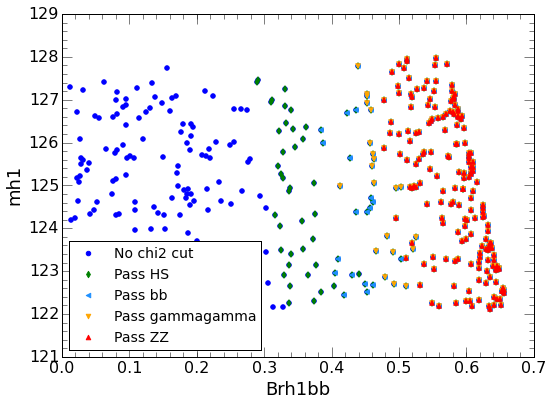

In [21]:
query = '122<mh1<128'
x_var = 'Brh1bb'
y_var = 'mh1'
plot_scatter(df=df_pass_all_ma1.query(query_str), xvar=x_var, yvar=y_var, 
             color='blue', marker='o', label='No chi2 cut')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), xvar=x_var, yvar=y_var, 
             color='green', marker='d', label='Pass HS')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), xvar=x_var, yvar=y_var, 
             color='dodgerblue', marker='<', label='Pass bb')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), xvar=x_var, yvar=y_var, 
             color='orange', marker='v', label='Pass gammagamma')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), xvar=x_var, yvar=y_var, 
             color='red', marker='^', label='Pass ZZ')
plt.legend(loc='lower left', fontsize=14, framealpha=1)
# plt.ylim(0, 0.003)
plt.xlim(0, 0.7)

(0, 0.7)

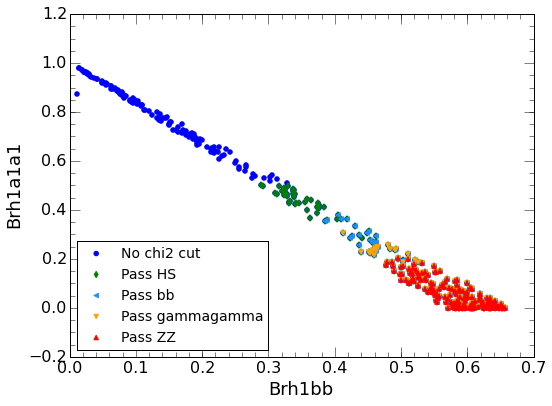

In [22]:
query = '122<mh1<128'
x_var = 'Brh1bb'
y_var = 'Brh1a1a1'
plot_scatter(df=df_pass_all_ma1.query(query_str), xvar=x_var, yvar=y_var, 
             color='blue', marker='o', label='No chi2 cut')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), xvar=x_var, yvar=y_var, 
             color='green', marker='d', label='Pass HS')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), xvar=x_var, yvar=y_var, 
             color='dodgerblue', marker='<', label='Pass bb')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), xvar=x_var, yvar=y_var, 
             color='orange', marker='v', label='Pass gammagamma')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), xvar=x_var, yvar=y_var, 
             color='red', marker='^', label='Pass ZZ')
plt.legend(loc='lower left', fontsize=14, framealpha=1)
# plt.ylim(0, 0.003)
plt.xlim(0, 0.7)

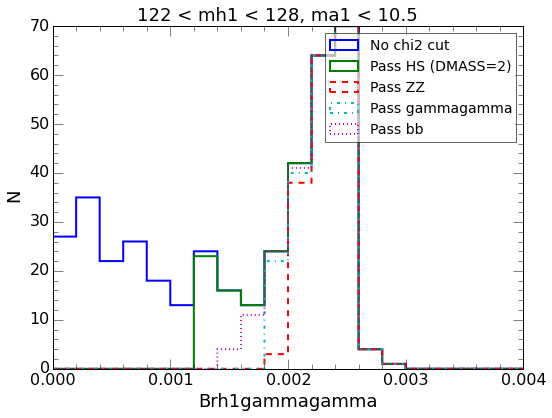

In [23]:
errbars = False
query_str = '122<mh1<128'
nbins = 50
x_range = [0, 0.01]
_ = plot_histogram(df=df_pass_all_ma1.query(query_str), 
                   var='Brh1gammagamma', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='No chi2 cut', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                   var='Brh1gammagamma', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass HS (DMASS=2)', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), 
                   var='Brh1gammagamma', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass ZZ', linestyle='dashed', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), 
                   var='Brh1gammagamma', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass gammagamma', linestyle='dashdot', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), 
                   var='Brh1gammagamma', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass bb', linestyle='dotted', linewidth=2)

plt.legend(loc=0, fontsize=14)
# plt.yscale('log')
# plt.ylim(0.1, 500)
plt.xlim(0, 0.004)
plt.suptitle('122 < mh1 < 128, ma1 < 10.5')

set_major_tick_interval('X', 0.001)

(120, 130)

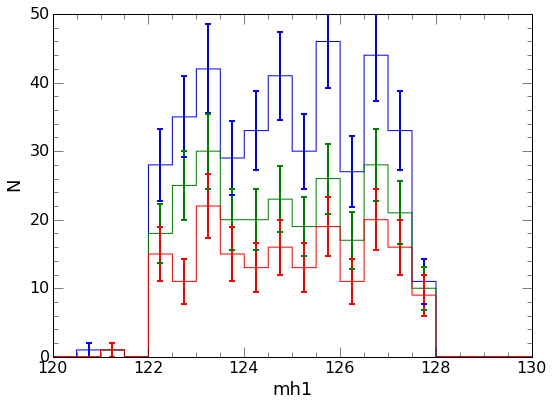

In [24]:
x_range = [120, 130]
nbins=20
plot_histogram(df=df_pass_all_ma1, 
               var='mh1', color='blue', range=x_range, histtype='step', bins=nbins)
plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05], 
             var='mh1', color='green', range=x_range, histtype='step', bins=nbins)
plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')], 
             var='mh1', color='red', range=x_range, histtype='step', bins=nbins)
plt.ylim(top=50)
plt.xlim(120, 130)

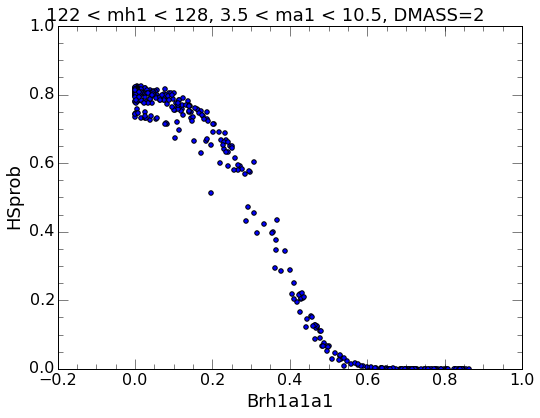

In [25]:
query_str = '122<mh1<128'

_ = plot_scatter(df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.0000].query(query_str), xvar='Brh1a1a1', yvar='HSprob')
plt.ylim(0, 1)
plt.suptitle('122 < mh1 < 128, 3.5 < ma1 < 10.5, DMASS=2')

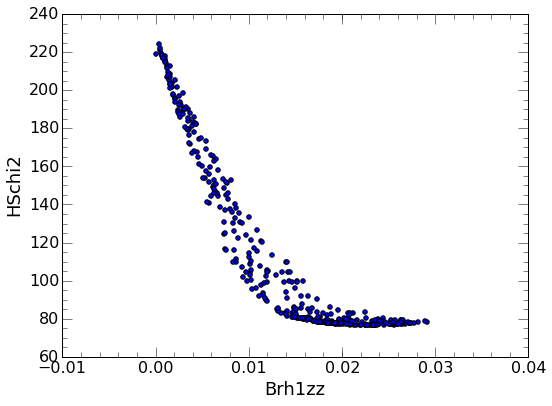

In [26]:
query_str = '122<mh1<128'

_ = plot_scatter(df=df_pass_all_ma1.query(query_str), xvar='Brh1zz', yvar='HSchi2')
# plt.ylim(0, 1)

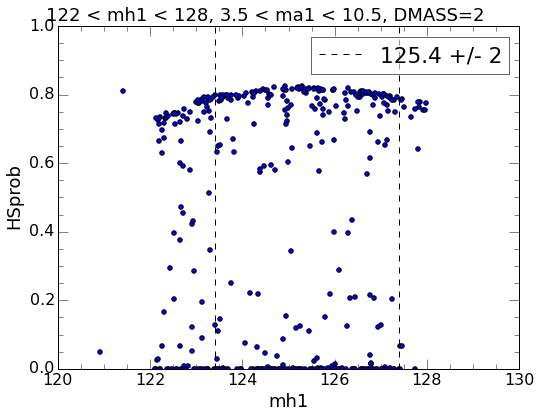

In [27]:
_ = plot_scatter(df=df_pass_all_ma1, xvar='mh1', yvar='HSprob')
plt.vlines([125.4-2, 125.4+2], 0, 1, linestyle='dashed', label='125.4 +/- 2')
plt.ylim(0, 1)
plt.legend(loc=0)
plt.xlim(120, 130)
plt.suptitle('122 < mh1 < 128, 3.5 < ma1 < 10.5, DMASS=2')

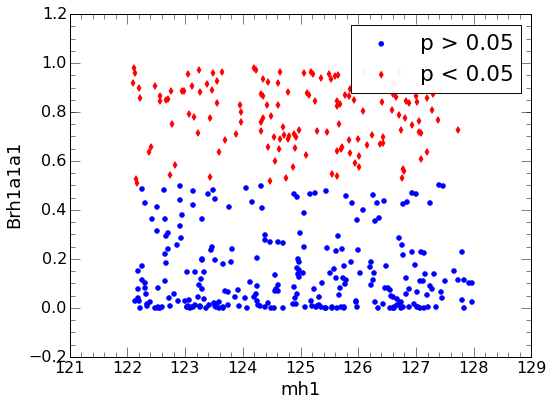

In [28]:
query_str = '122<mh1<128'

_ = plot_scatter(df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                 xvar='mh1', yvar='Brh1a1a1', color='blue', label='p > 0.05')
_ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob<0.05].query(query_str), 
                 xvar='mh1', yvar='Brh1a1a1', color='red', label='p < 0.05', marker='d')
plt.legend(loc=0, framealpha=0.95)

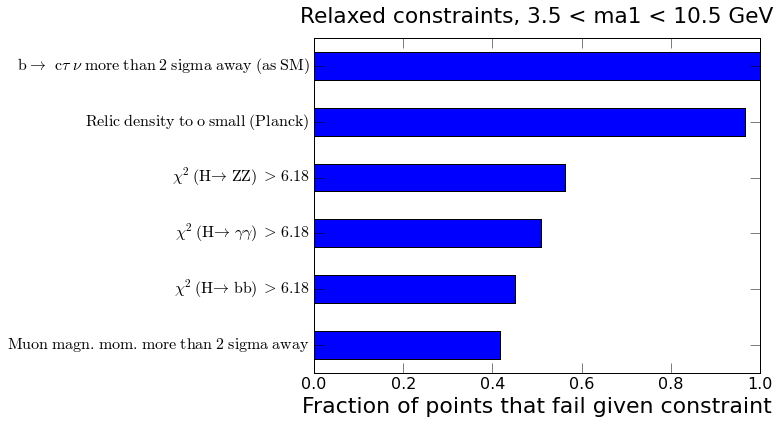

In [42]:
plot_constraints(df_pass_all_ma1, 'Relaxed constraints, 3.5 < ma1 < 10.5 GeV')

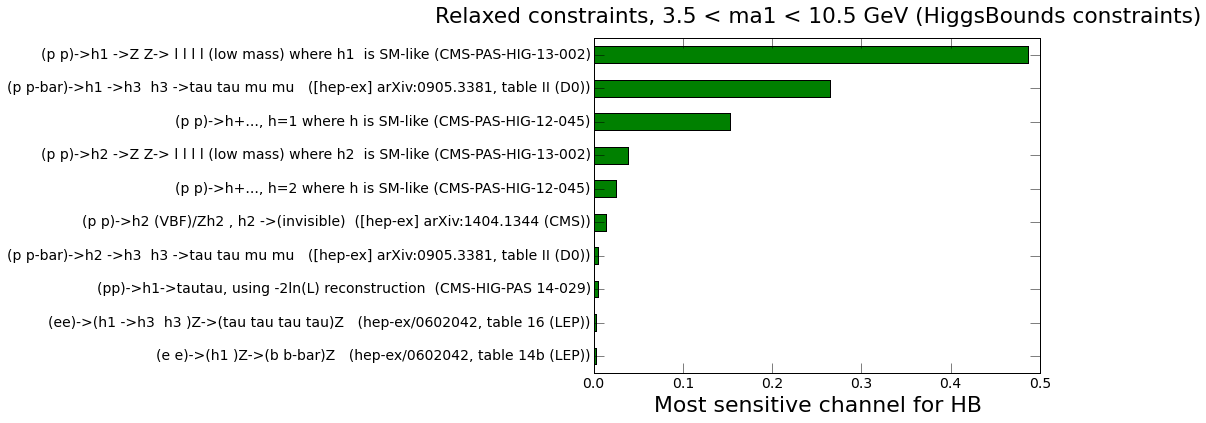

In [43]:
plot_constraints_HB(df_pass_all_ma1, 'Relaxed constraints, 3.5 < ma1 < 10.5 GeV (HiggsBounds constraints)')

In [31]:
# We need to divide up the dataset into several groupings:
# - pass NT chi2 or fail
# - pass HS chi2 or fail
# - pass HB or fail

fail_NT_chi2 = df_pass_all.constraints.str.contains('chi2')
pass_NT_chi2 = ~ fail_NT_chi2

fail_HS = df_pass_all.HSprob < 0.05
pass_HS = ~fail_HS

fail_HB = df_pass_all.HBresult == 0
pass_HB = ~fail_HB

In [44]:
pass_gm2 = ~df_pass_all.constraints.str.contains('Muon')
pass_relic = ~df_pass_all.constraints.str.contains('Relic')

In [56]:
df_pass_NT = df_pass_all[pass_NT_chi2]

df_fail_NT_fail_HS_fail_HB = df_pass_all[fail_NT_chi2 & fail_HS & fail_HB]
df_fail_NT_fail_HS_pass_HB = df_pass_all[fail_NT_chi2 & fail_HS & pass_HB]

df_fail_NT_pass_HS_fail_HB = df_pass_all[fail_NT_chi2 & pass_HS & fail_HB]
df_fail_NT_pass_HS_pass_HB = df_pass_all[fail_NT_chi2 & pass_HS & pass_HB]

df_pass_NT_pass_HS_fail_HB = df_pass_all[pass_NT_chi2 & pass_HS & fail_HB]
df_pass_NT_pass_HS_pass_HB = df_pass_all[pass_NT_chi2 & pass_HS & pass_HB]
df_pass_NT_fail_HS_fail_HB = df_pass_all[pass_NT_chi2 & fail_HS & fail_HB]
df_pass_NT_fail_HS_pass_HB = df_pass_all[pass_NT_chi2 & fail_HS & pass_HB]

In [46]:
print 'Fail NT, fail HS, fail HB:', len(df_fail_NT_fail_HS_fail_HB.index)
print 'Fail NT, fail HS, pass HB:', len(df_fail_NT_fail_HS_pass_HB.index)
print 'Fail NT, pass HS, fail HB:', len(df_fail_NT_pass_HS_fail_HB.index)
print 'Fail NT, pass HS, pass HB:', len(df_fail_NT_pass_HS_pass_HB.index)
print 'Pass NT, pass HS, fail HB:', len(df_pass_NT_pass_HS_fail_HB.index)
print 'Pass NT, pass HS, pass HB:', len(df_pass_NT_pass_HS_pass_HB.index)
print 'Pass NT, fail HS, fail HB:', len(df_pass_NT_fail_HS_fail_HB.index)
print 'Pass NT, fail HS, pass HB:', len(df_pass_NT_fail_HS_pass_HB.index)

Fail NT, fail HS, fail HB: 177
Fail NT, fail HS, pass HB: 7619
Fail NT, pass HS, fail HB: 1
Fail NT, pass HS, pass HB: 5006
Pass NT, pass HS, fail HB: 0
Pass NT, pass HS, pass HB: 9508
Pass NT, fail HS, fail HB: 0
Pass NT, fail HS, pass HB: 0


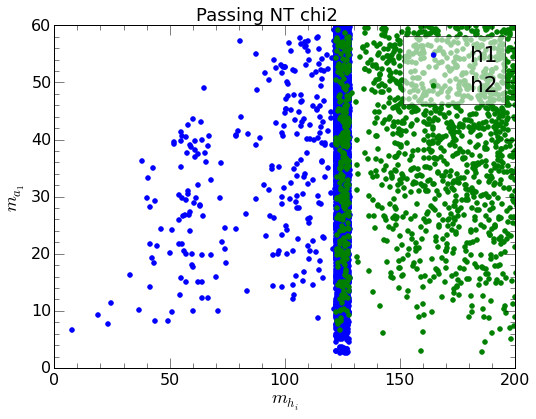

In [82]:
plot_scatter(xvar='mh1', yvar='ma1', df=df_pass_NT, color='blue', label='h1')
plot_scatter(ax=plt.gca(), xvar='mh2', yvar='ma1', df=df_pass_NT, color='green', label='h2')
plt.xlim(0, 200)
# plt.xscale('log')
plt.ylim(0, 60)
# plt.yscale('log')
plt.xlabel(r'$m_{h_i}$')
plt.ylabel(r'$m_{a_1}$')
plt.legend(loc='best')
plt.suptitle('Passing NT chi2')

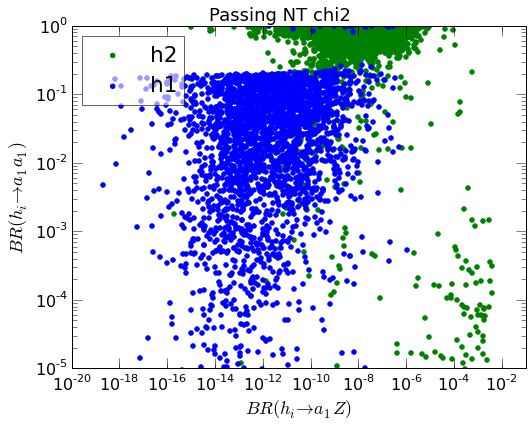

In [78]:
plot_scatter(xvar='Brh2a1z', yvar='Brh2a1a1', df=df_pass_NT, color='green', label='h2')
plot_scatter(ax=plt.gca(), xvar='Brh1a1z', yvar='Brh1a1a1', df=df_pass_NT, color='blue', label='h1')
plt.xlim(1E-20, 0.1)
plt.xscale('log')
plt.ylim(1E-5, 1)
plt.yscale('log')
plt.xlabel(r'$BR(h_i \to a_1 Z )$')
plt.ylabel(r'$BR(h_i \to a_1 a_1 )$')
plt.legend(loc='upper left')
plt.suptitle('Passing NT chi2')

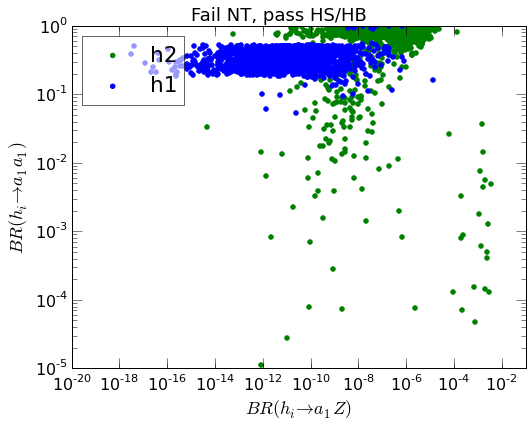

In [79]:
plot_scatter(xvar='Brh2a1z', yvar='Brh2a1a1', df=df_fail_NT_pass_HS_pass_HB, color='green', label='h2')
plot_scatter(ax=plt.gca(), xvar='Brh1a1z', yvar='Brh1a1a1', df=df_fail_NT_pass_HS_pass_HB, color='blue', label='h1')
plt.xlim(1E-20, 0.1)
plt.xscale('log')
plt.ylim(1E-5, 1)
plt.yscale('log')
plt.xlabel(r'$BR(h_i \to a_1 Z )$')
plt.ylabel(r'$BR(h_i \to a_1 a_1 )$')
plt.legend(loc='upper left')
plt.suptitle('Fail NT, pass HS/HB')

In [47]:
df_fail_NT_fail_HS_fail_HB.columns.values

array(['Bra1bb', 'Bra1cc', 'Bra1gg', 'Bra1mumu', 'Bra1ss', 'Bra1tautau',
       'Brh1a1a1', 'Brh1a1z', 'Brh1bb', 'Brh1cc', 'Brh1gammagamma',
       'Brh1gg', 'Brh1mumu', 'Brh1tautau', 'Brh1ww', 'Brh1zgamma',
       'Brh1zz', 'Brh2a1a1', 'Brh2a1z', 'Brh2bb', 'Brh2gammagamma',
       'Brh2gg', 'Brh2h1h1', 'Brh2tautau', 'Brh2ww', 'Brh2zgamma',
       'Brh2zz', 'Del_a_mu', 'HBchannel', 'HBobsratio', 'HBresult',
       'HS_10_chi2', 'HS_10_muPred', 'HS_11_chi2', 'HS_11_muPred',
       'HS_12_chi2', 'HS_12_muPred', 'HS_13_chi2', 'HS_13_muPred',
       'HS_14_chi2', 'HS_14_muPred', 'HS_15_chi2', 'HS_15_muPred',
       'HS_16_chi2', 'HS_16_muPred', 'HS_17_chi2', 'HS_17_muPred',
       'HS_18_chi2', 'HS_18_muPred', 'HS_19_chi2', 'HS_19_muPred',
       'HS_1_chi2', 'HS_1_muPred', 'HS_20_chi2', 'HS_20_muPred',
       'HS_21_chi2', 'HS_21_muPred', 'HS_22_chi2', 'HS_22_muPred',
       'HS_23_chi2', 'HS_23_muPred', 'HS_24_chi2', 'HS_24_muPred',
       'HS_25_chi2', 'HS_25_muPred', 'HS_26_chi2', 'HS_

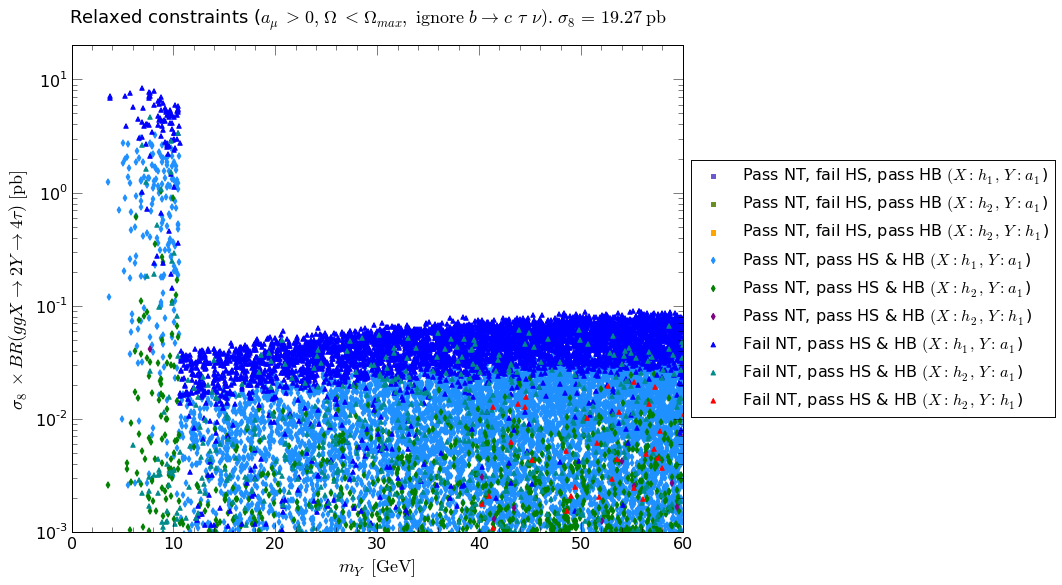

In [48]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_4tau' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_4tau' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_4tau' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])

_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS, pass HB ' + lab_h1a1, 
                 color='slateblue', marker='s')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS, pass HB ' + lab_h2a1, 
                 color='olivedrab', marker='s')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2h1, label='Pass NT, fail HS, pass HB ' + lab_h2h1, 
                 color='orange', marker='s')


# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h1a1, label='Fail NT, fail HS, pass HB ' + lab_h1a1, 
#                  color='slateblue', marker='o')
# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h2a1, label='Fail NT, fail HS, pass HB ' + lab_h2a1, 
#                  color='olivedrab', marker='o')
# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h2h1, label='Fail NT, fail HS, pass HB ' + lab_h2h1, 
#                  color='orange', marker='o')

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
#                  color='cyan', marker='v')
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
#                  color='lime', marker='v')
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
#                  color='magenta', marker='v')



box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.legend(loc='center left', fontsize=16, framealpha=0.95, bbox_to_anchor=(1, 0.5))
plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 4\tau)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.ylim(1E-3, 20)
plt.xlim(0, 60)
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

(<matplotlib.axes._subplots.AxesSubplot at 0x124e80390>,
 <matplotlib.collections.PathCollection at 0x124f21c10>)

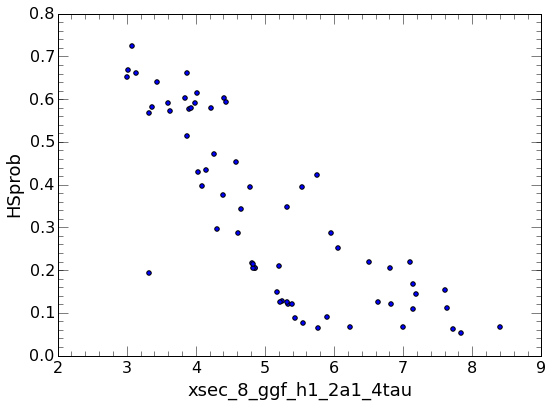

In [49]:
plot_scatter(df=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>3'), xvar='xsec_8_ggf_h1_2a1_4tau', yvar='HSprob')

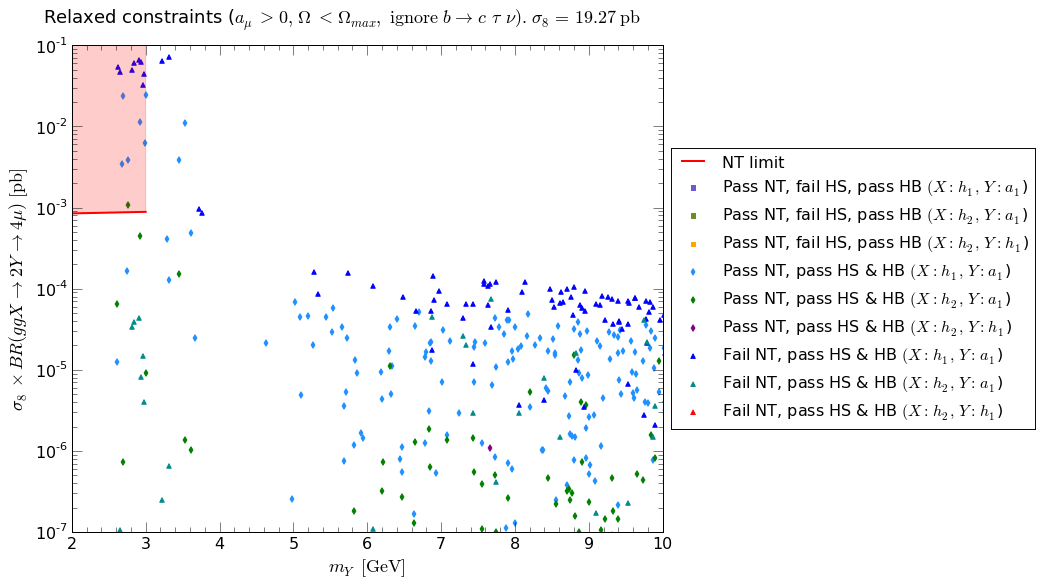

In [50]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_4mu' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_4mu' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_4mu' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])

_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS, pass HB ' + lab_h1a1, 
                 color='slateblue', marker='s')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS, pass HB ' + lab_h2a1, 
                 color='olivedrab', marker='s')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2h1, label='Pass NT, fail HS, pass HB ' + lab_h2h1, 
                 color='orange', marker='s')


# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h1a1, label='Fail NT, fail HS, pass HB ' + lab_h1a1, 
#                  color='slateblue', marker='o')
# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h2a1, label='Fail NT, fail HS, pass HB ' + lab_h2a1, 
#                  color='olivedrab', marker='o')
# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h2h1, label='Fail NT, fail HS, pass HB ' + lab_h2h1, 
#                  color='orange', marker='o')

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
#                  color='cyan', marker='v')
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
#                  color='lime', marker='v')
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
#                  color='magenta', marker='v')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 4\mu)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

m_4mu = [0.25, 0.5, 0.75, 1, 2, 3]
xsec_4mu = [3.8E-3, 3.6E-3, 4.1E-3, 4.2E-3, 4.4E-3, 4.6E-3] # these are BR percentages not fractions!
xsec_4mu = [19.27 * x * 1E-2 for x in xsec_4mu]
plt.plot(m_4mu, xsec_4mu, 'r', label='NT limit', linewidth=2)
y_top = plt.ylim()[1]
upper_edge = np.ones_like(m_4mu) * y_top
plt.fill_between(m_4mu, xsec_4mu,
                 y2=upper_edge,
                 color='red',
                 alpha=0.2, label='NT exclude 4mu')
plt.ylim(1E-7, 0.1)
plt.xlim(2, 10)
plt.legend(loc='center left', fontsize=16, framealpha=0.95, bbox_to_anchor=(1, 0.5))


In [51]:
df_pass_all.columns.values

array(['Bra1bb', 'Bra1cc', 'Bra1gg', 'Bra1mumu', 'Bra1ss', 'Bra1tautau',
       'Brh1a1a1', 'Brh1a1z', 'Brh1bb', 'Brh1cc', 'Brh1gammagamma',
       'Brh1gg', 'Brh1mumu', 'Brh1tautau', 'Brh1ww', 'Brh1zgamma',
       'Brh1zz', 'Brh2a1a1', 'Brh2a1z', 'Brh2bb', 'Brh2gammagamma',
       'Brh2gg', 'Brh2h1h1', 'Brh2tautau', 'Brh2ww', 'Brh2zgamma',
       'Brh2zz', 'Del_a_mu', 'HBchannel', 'HBobsratio', 'HBresult',
       'HS_10_chi2', 'HS_10_muPred', 'HS_11_chi2', 'HS_11_muPred',
       'HS_12_chi2', 'HS_12_muPred', 'HS_13_chi2', 'HS_13_muPred',
       'HS_14_chi2', 'HS_14_muPred', 'HS_15_chi2', 'HS_15_muPred',
       'HS_16_chi2', 'HS_16_muPred', 'HS_17_chi2', 'HS_17_muPred',
       'HS_18_chi2', 'HS_18_muPred', 'HS_19_chi2', 'HS_19_muPred',
       'HS_1_chi2', 'HS_1_muPred', 'HS_20_chi2', 'HS_20_muPred',
       'HS_21_chi2', 'HS_21_muPred', 'HS_22_chi2', 'HS_22_muPred',
       'HS_23_chi2', 'HS_23_muPred', 'HS_24_chi2', 'HS_24_muPred',
       'HS_25_chi2', 'HS_25_muPred', 'HS_26_chi2', 'HS_

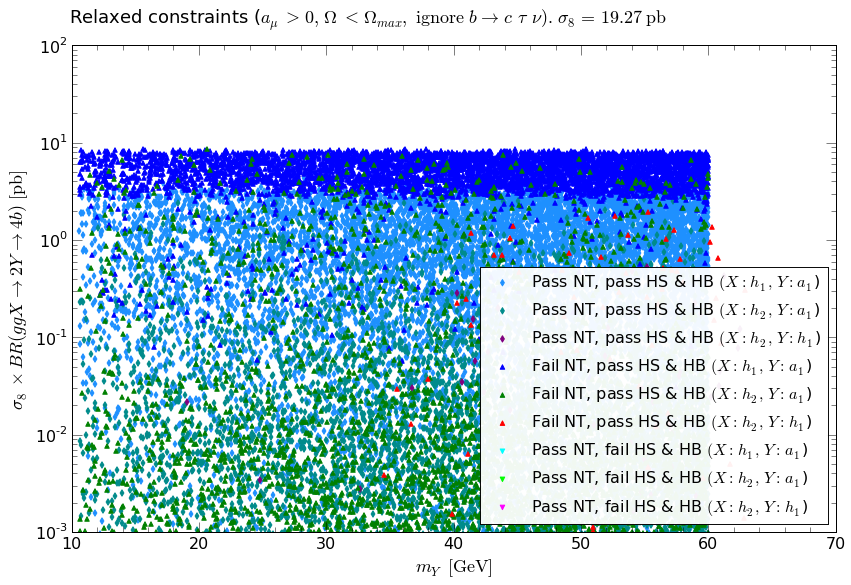

In [52]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_4b' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_4b' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_4b' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
                 color='cyan', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
                 color='lime', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
                 color='magenta', marker='v')

plt.legend(loc=4, fontsize=16, framealpha=0.95)
plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 4b)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.ylim(1E-3, 100)
plt.xlim(10, 70)
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

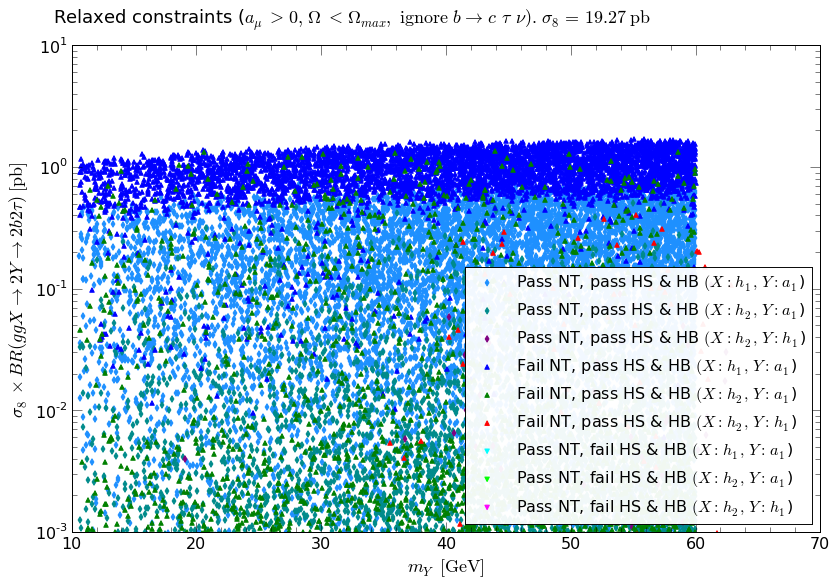

In [53]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_2b2tau' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_2b2tau' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_2b2tau' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
                 color='cyan', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
                 color='lime', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
                 color='magenta', marker='v')

plt.legend(loc=4, fontsize=16, framealpha=0.95)
plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 2b2\tau)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.ylim(1E-3, 10)
plt.xlim(10, 70)
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

In [54]:
# Save to CSV for portability
import os
odir = 'range_large_final_relaxed_DMASS2_fixedAssignMass'
if not os.path.isdir(odir):
    os.makedirs(odir)
col_list=['ma1', 'mh1', 'mh2', 
          'xsec_8_ggf_h1_2a1_4tau', 'xsec_8_ggf_h2_2a1_4tau', 'xsec_8_ggf_h2_2h1_4tau', 
          'xsec_8_ggf_h1_2a1_4b', 'xsec_8_ggf_h2_2a1_4b', 'xsec_8_ggf_h2_2h1_4b', 
          'xsec_8_ggf_h1_2a1_2b2tau', 'xsec_8_ggf_h2_2a1_2b2tau', 'xsec_8_ggf_h2_2h1_2b2tau',
          'xsec_8_ggf_h1_2a1_2tau2mu', 'xsec_8_ggf_h2_2a1_2tau2mu', 'xsec_8_ggf_h2_2h1_2tau2mu',
          'xsec_8_ggf_h1_2a1_4mu', 'xsec_8_ggf_h2_2a1_4mu', 'xsec_8_ggf_h2_2h1_4mu']

df_fail_NT_fail_HS_fail_HB.to_csv(os.path.join(odir, 'df_fail_NT_fail_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_fail_NT_fail_HS_pass_HB.to_csv(os.path.join(odir, 'df_fail_NT_fail_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_fail_NT_pass_HS_fail_HB.to_csv(os.path.join(odir, 'df_fail_NT_pass_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_fail_NT_pass_HS_pass_HB.to_csv(os.path.join(odir, 'df_fail_NT_pass_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_pass_HS_fail_HB.to_csv(os.path.join(odir, 'df_pass_NT_pass_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_pass_HS_pass_HB.to_csv(os.path.join(odir, 'df_pass_NT_pass_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_fail_HS_fail_HB.to_csv(os.path.join(odir, 'df_pass_NT_fail_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_fail_HS_pass_HB.to_csv(os.path.join(odir, 'df_pass_NT_fail_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)

In [55]:
df_fail_NT_fail_HS_fail_HB[col_list].query('ma1<4')

Empty DataFrame
Columns: [ma1, mh1, mh2, xsec_8_ggf_h1_2a1_4tau, xsec_8_ggf_h2_2a1_4tau, xsec_8_ggf_h2_2h1_4tau, xsec_8_ggf_h1_2a1_4b, xsec_8_ggf_h2_2a1_4b, xsec_8_ggf_h2_2h1_4b, xsec_8_ggf_h1_2a1_2b2tau, xsec_8_ggf_h2_2a1_2b2tau, xsec_8_ggf_h2_2h1_2b2tau, xsec_8_ggf_h1_2a1_2tau2mu, xsec_8_ggf_h2_2a1_2tau2mu, xsec_8_ggf_h2_2h1_2tau2mu, xsec_8_ggf_h1_2a1_4mu, xsec_8_ggf_h2_2a1_4mu, xsec_8_ggf_h2_2h1_4mu]
Index: []

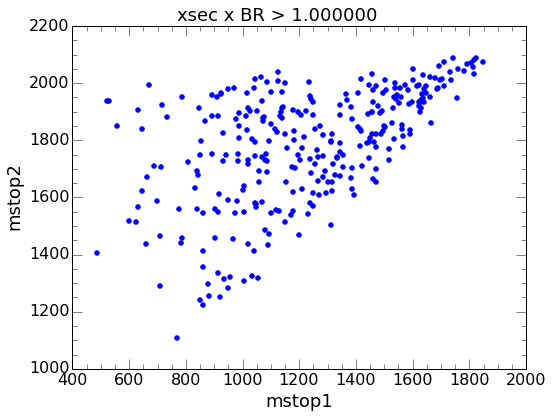

In [44]:
limit = 1
plot_scatter(df=df_pass_all.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop1', yvar='mstop2', color='blue')
plt.suptitle('xsec x BR > %f' % limit)

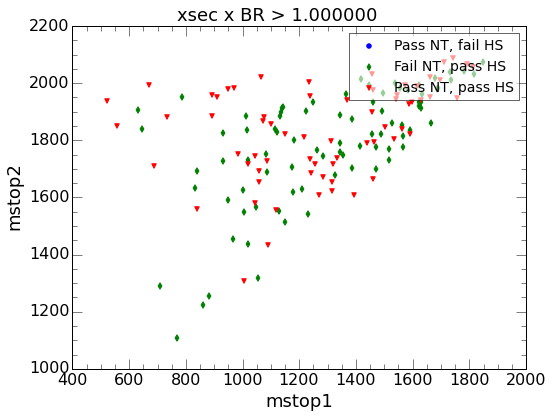

In [45]:
limit = 1
plot_scatter(df=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop1', yvar='mstop2', color='blue', label='Pass NT, fail HS')
plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop1', yvar='mstop2', color='green', label='Fail NT, pass HS', marker='d')
plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop1', yvar='mstop2', color='red', label='Pass NT, pass HS', marker='v')
plt.suptitle('xsec x BR > %f' % limit)
plt.legend(loc=0, fontsize=14)

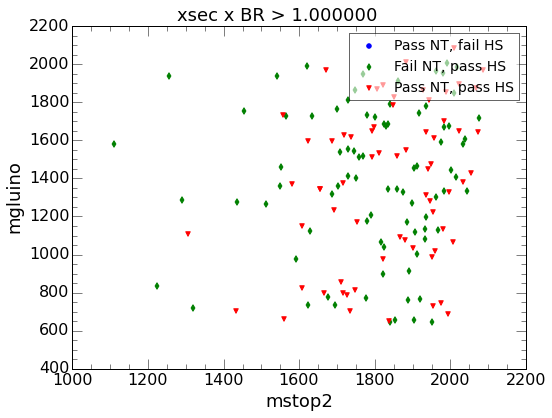

In [46]:
limit = 1
plot_scatter(df=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop2', yvar='mgluino', color='blue', label='Pass NT, fail HS')
plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop2', yvar='mgluino', color='green', label='Fail NT, pass HS', marker='d')
plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop2', yvar='mgluino', color='red', label='Pass NT, pass HS', marker='v')
plt.suptitle('xsec x BR > %f' % limit)
plt.legend(loc=0, fontsize=14)

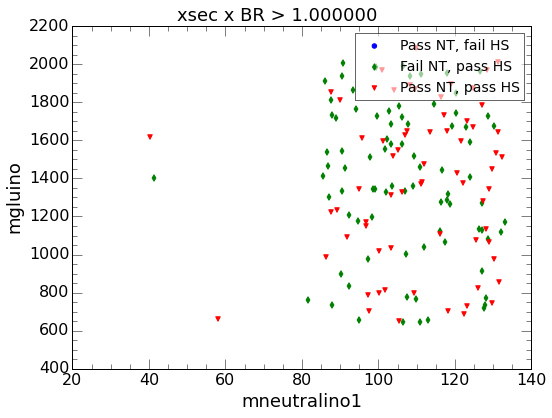

In [47]:
limit = 1
plot_scatter(df=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mgluino', color='blue', label='Pass NT, fail HS')
plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mgluino', color='green', label='Fail NT, pass HS', marker='d')
plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mgluino', color='red', label='Pass NT, pass HS', marker='v')
plt.suptitle('xsec x BR > %f' % limit)
plt.legend(loc=0, fontsize=14)

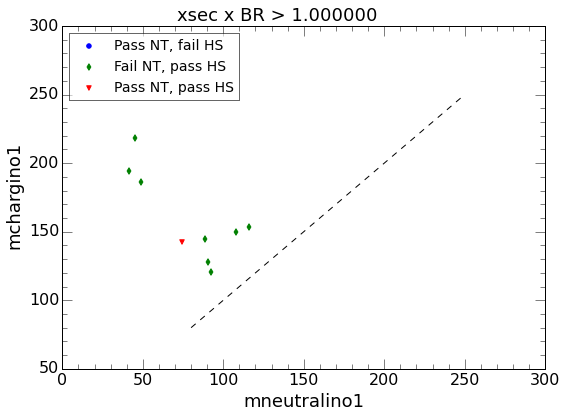

In [48]:
limit = 1
plot_scatter(df=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h2_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mchargino1', color='blue', label='Pass NT, fail HS')
plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h2_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mchargino1', color='green', label='Fail NT, pass HS', marker='d')
plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h2_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mchargino1', color='red', label='Pass NT, pass HS', marker='v')
plt.suptitle('xsec x BR > %f' % limit)
plt.legend(loc=0, fontsize=14)
plt.plot([80, 250], [80, 250], 'k--')

(0, 40)

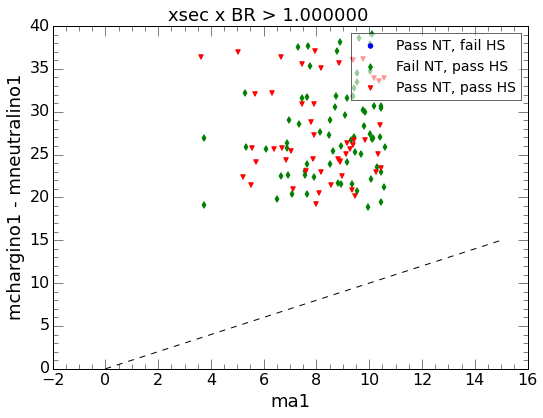

In [49]:
limit = 1
plot_scatter(xarray=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).ma1.values,
             yarray=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mchargino1.values - df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mneutralino1.values, 
             color='blue', label='Pass NT, fail HS')
plot_scatter(ax=plt.gca(), xarray=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).ma1.values,
             yarray=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mchargino1.values - df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mneutralino1.values, 
             color='green', label='Fail NT, pass HS', marker='d')
plot_scatter(ax=plt.gca(), xarray=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).ma1.values,
             yarray=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mchargino1.values - df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mneutralino1.values, 
             color='red', label='Pass NT, pass HS', marker='v')
plt.ylabel('mchargino1 - mneutralino1')
plt.xlabel('ma1')
plt.suptitle('xsec x BR > %f' % limit)
plt.legend(loc=0, fontsize=14)
plt.plot([0, 15], [0, 15], 'k--')
plt.ylim([0, 40])

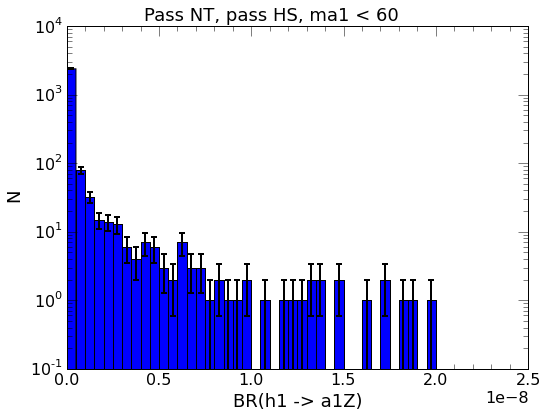

In [50]:
_ = plot_histogram(array=df_pass_NT_pass_HS_pass_HB.Brh1a1z.dropna().values, bins=40, range=[0, 2E-8])
plt.yscale('log')
plt.xlabel('BR(h1 -> a1Z)')
plt.suptitle('Pass NT, pass HS, ma1 < 60')

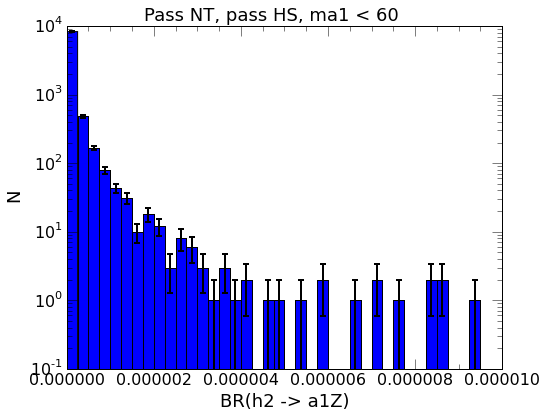

In [51]:
_ = plot_histogram(array=df_pass_NT_pass_HS_pass_HB.Brh2a1z.dropna().values, bins=40, range=[0, 0.00001])
plt.yscale('log')
plt.xlabel('BR(h2 -> a1Z)')
plt.suptitle('Pass NT, pass HS, ma1 < 60')

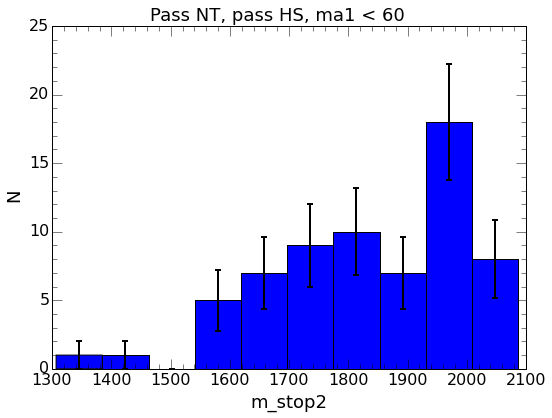

In [52]:
_ = plot_histogram(df=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>1'), var='mstop2')
# plt.yscale('log')
plt.xlabel('m_stop2')
plt.suptitle('Pass NT, pass HS, ma1 < 60')

In [53]:
df_HS_peaks = pd.read_csv('peak_information.txt', delim_whitespace=True, header=0)

In [54]:
df_HS_peaks

Number  Analysis-ID  mh_obs  mu_obs  dmu_low  dmu_high  dmh_exp  \
0        1    201406002  125.36  1.2700   0.4500    0.5300     8.00   
1        2    201406001  125.36  1.0100   0.2500    0.2700     8.00   
2        3       519103  125.36  0.2600   0.9400    1.6400     2.00   
3        4       519102  124.51  1.6600   0.4400    0.5100     0.52   
4        5       708405  125.40  1.3270   0.7732    0.9150     2.00   
5        6       708406  125.40  0.6820   0.5082    0.6670     2.00   
6        7       708408  125.40  3.5100   2.4170    3.3040     1.56   
7        8       708407  125.40  0.2268   1.3878    1.6742     2.00   
8        9       708409  125.40  0.4080   1.0560    1.4270     2.00   
9       10       708402  125.40  1.6190   0.8311    1.0030     2.00   
10      11       708401  125.98  0.6244   0.3976    0.4246     0.50   
11      12       708404  125.40  1.7290   1.1800    1.3430     2.00   
12      13       708403  125.40  2.0340   0.5260    0.5700     2.00   
13      14       708410  125.40 -0.8424   1.2503    3.2294     2.00   
14      15       708411  125.40  2.4230   2.0681    3.2120     2.00   
15      16    201406106  125.36  1.4000   0.7000    0.9000    20.00   
16      17    201406105  125.36  3.6000   1.6000    2.0000    20.00   
17      18    201406104  125.36  1.0000   0.5000    0.6000    20.00   
18      19    201406103  125.36  0.9000   0.9000    1.0000    20.00   
19      20    201406102  125.36  1.8000   0.9000    1.1000    20.00   
20      21    201406101  125.36  3.0000   1.7000    1.9000    20.00   
21      22       621201  125.00 -0.3500   0.5200    0.5500    15.00   
22      23       621202  125.00  1.1700   0.6000    0.6600    15.00   
23      24       621203  125.00  0.9400   0.7900    0.8800    15.00   
24      25     20150053  125.36  3.7000   1.8000    1.9000    20.00   
25      26     20150052  125.36  0.7200   1.1000    1.3000    20.00   
26      27     20150051  125.36  4.9000   3.1000    4.6000    20.00   
27      28     20150065  125.00 -9.6000   9.7000    9.6000    20.00   
28      29     20150061  125.00  2.8000   1.9000    2.1000    20.00   
29      30     20150063  125.00 -0.9000   2.0000    3.1000    20.00   
..     ...          ...     ...     ...      ...       ...      ...   
55      56        55823  124.70  3.5210   2.4500    3.8920     2.00   
56      57        55810  124.70  0.7140   3.5630    6.1970     2.00   
57      58        55801  124.70  1.9730   1.2500    1.5050     2.00   
58      59        55811  124.70  0.1300   0.7440    1.0940     2.00   
59      60        55802  124.70  1.2330   0.8800    0.9790     2.00   
60      61        55812  124.70  0.9190   0.4870    0.5670     2.00   
61      62        55803  124.70  1.6020   1.1740    1.2460     2.00   
62      63        55813  124.70  1.1020   0.4400    0.4770     0.34   
63      64        55804  124.70  2.6120   1.6530    1.7380     2.00   
64      65        55814  124.70  0.6480   0.8870    0.6530     2.00   
65      66        55815  124.70  1.4570   1.2380    1.2890     2.00   
66      67      1300701  125.70  2.9000   2.7000    2.8000     2.00   
67      68      1300401  125.00  0.4000   1.1300    0.7300    25.00   
68      69      1300402  125.00  1.0600   0.4700    0.4700    25.00   
69      70      1300404  125.00  0.9300   0.4100    0.4100    20.00   
70      71    131211293  125.60  0.3900   1.8700    1.9700    20.00   
71      72      1301701  125.00  1.0000   2.0000    2.0000    20.00   
72      73      1301201  125.70  1.0000   0.4857    0.5070    12.50   
73      74      1300403  125.70  0.9810   1.4960    1.6800    20.00   
74      75    131211294  125.60  0.5600   0.9500    1.2700    20.00   
75      76       168204  125.60  5.3000   1.8000    2.1000    25.00   
76      77       168205  125.60  3.1000   2.0000    2.4000    25.00   
77      78       168206  125.60 -4.7000   1.3000    5.0000    25.00   
78      79       168202  125.60  0.7000   1.9000    1.9000    25.00   
79      80       168201  125

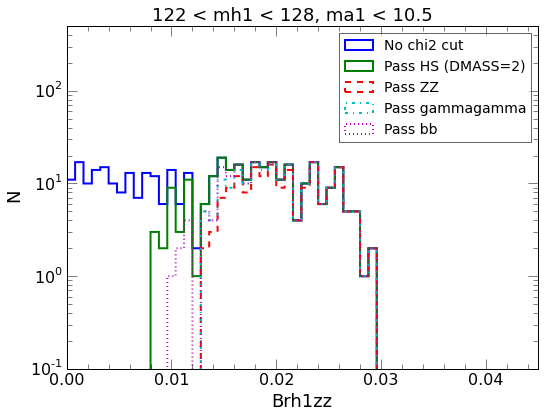

In [55]:
errbars = False
query_str = '122<mh1<128'
nbins = 50
x_range = [0, 0.04]
xvar = 'Brh1zz'
_ = plot_histogram(df=df_pass_all_ma1.query(query_str), 
                   var=xvar, bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='No chi2 cut', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                   var=xvar, bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass HS (DMASS=2)', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), 
                   var=xvar, bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass ZZ', linestyle='dashed', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), 
                   var=xvar, bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass gammagamma', linestyle='dashdot', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), 
                   var=xvar, bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass bb', linestyle='dotted', linewidth=2)
HS_mask = df_HS_peaks.description.str.contains('ZZ')



plt.legend(loc=0, fontsize=14)
plt.yscale('log')
plt.ylim(0.1, 500)
# plt.xlim(0, 0.4)
plt.suptitle('122 < mh1 < 128, ma1 < 10.5')
set_major_tick_interval('X', 0.01)

In [56]:
df_pass_all_ma1.columns.values

array(['Bra1bb', 'Bra1cc', 'Bra1gg', 'Bra1mumu', 'Bra1ss', 'Bra1tautau',
       'Brh1a1a1', 'Brh1a1z', 'Brh1bb', 'Brh1cc', 'Brh1gammagamma',
       'Brh1gg', 'Brh1mumu', 'Brh1tautau', 'Brh1ww', 'Brh1zgamma',
       'Brh1zz', 'Brh2a1a1', 'Brh2a1z', 'Brh2bb', 'Brh2gammagamma',
       'Brh2gg', 'Brh2h1h1', 'Brh2tautau', 'Brh2ww', 'Brh2zgamma',
       'Brh2zz', 'Del_a_mu', 'HBchannel', 'HBobsratio', 'HBresult',
       'HS_10_chi2', 'HS_10_muPred', 'HS_11_chi2', 'HS_11_muPred',
       'HS_12_chi2', 'HS_12_muPred', 'HS_13_chi2', 'HS_13_muPred',
       'HS_14_chi2', 'HS_14_muPred', 'HS_15_chi2', 'HS_15_muPred',
       'HS_16_chi2', 'HS_16_muPred', 'HS_17_chi2', 'HS_17_muPred',
       'HS_18_chi2', 'HS_18_muPred', 'HS_19_chi2', 'HS_19_muPred',
       'HS_1_chi2', 'HS_1_muPred', 'HS_20_chi2', 'HS_20_muPred',
       'HS_21_chi2', 'HS_21_muPred', 'HS_22_chi2', 'HS_22_muPred',
       'HS_23_chi2', 'HS_23_muPred', 'HS_24_chi2', 'HS_24_muPred',
       'HS_25_chi2', 'HS_25_muPred', 'HS_26_chi2', 'HS_

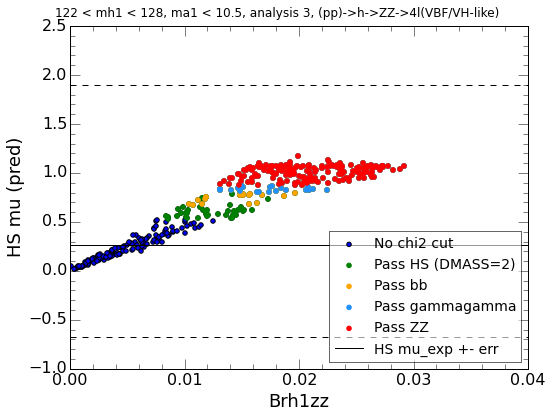

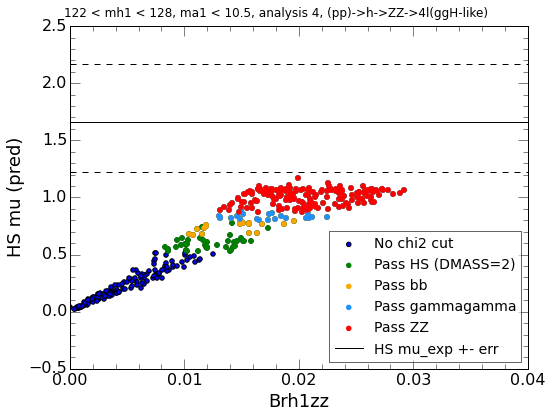

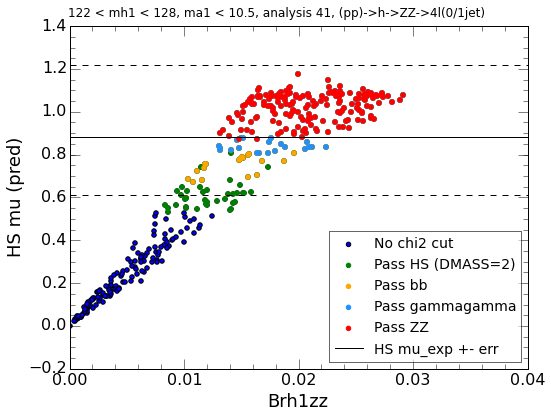

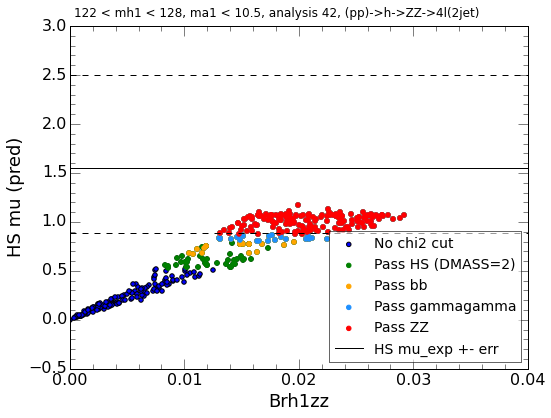

In [57]:

query_str = '122<mh1<128'

xvar = 'Brh1zz'
chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('ZZ')].Number.values

for chan in chan_nums:
    yvar = 'HS_%d_muPred' % chan
    _ = plot_scatter(df=df_pass_all_ma1.query(query_str), 
                       xvar=xvar, yvar=yvar, label='No chi2 cut')

    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass HS (DMASS=2)', color='green')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass bb', color='orange')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass gammagamma', color='dodgerblue')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass ZZ', color='red')

    plt.xlim(left=0)
    plt.ylabel('HS mu (pred)')
    
    # plot HS mu
    HS_mask = df_HS_peaks.Number == chan
#     print df_HS_peaks[HS_mask]
    mu_obs = df_HS_peaks[HS_mask].mu_obs.values[0]
    dmu_low = df_HS_peaks[HS_mask].dmu_low.values[0]
    dmu_high = df_HS_peaks[HS_mask].dmu_high.values[0]

    xlim = plt.xlim()
    plt.hlines(mu_obs, *xlim, label='HS mu_exp +- err')
    plt.hlines(mu_obs-dmu_low, *xlim, linestyle='dashed')
    plt.hlines(mu_obs+dmu_high, *xlim, linestyle='dashed')
    
    plt.legend(loc=4, fontsize=14)
    desc = df_HS_peaks[HS_mask].description.values[0]
    plt.suptitle('122 < mh1 < 128, ma1 < 10.5, analysis %d, %s' % (chan, desc), fontsize=12)

    set_major_tick_interval('X', 0.01)

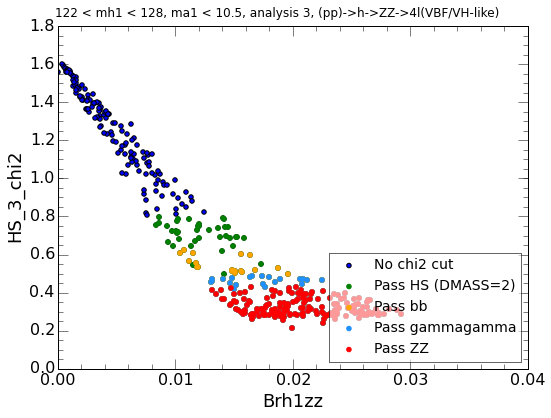

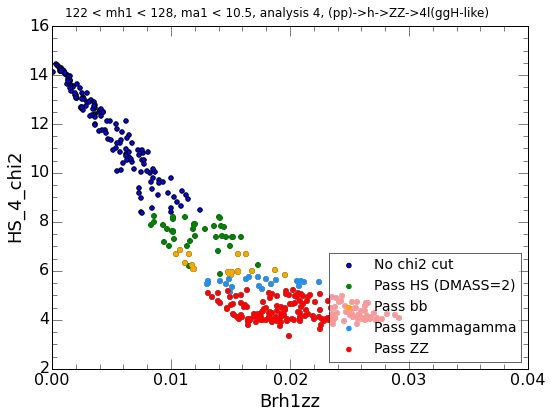

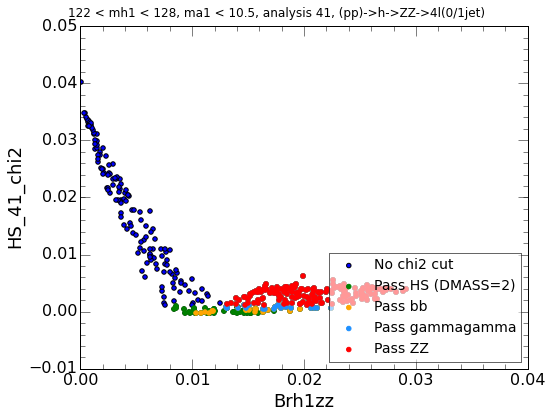

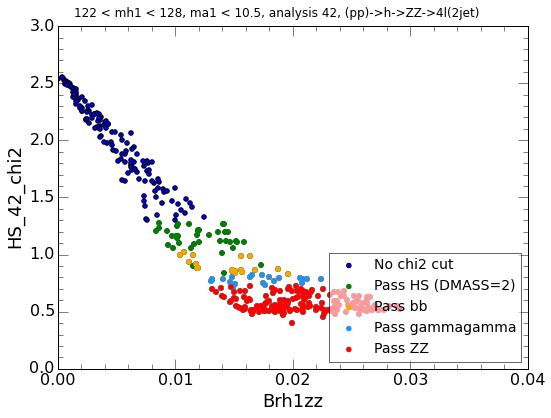

In [58]:

query_str = '122<mh1<128'

xvar = 'Brh1zz'
chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('ZZ')].Number.values

for chan in chan_nums:
    yvar = 'HS_%d_chi2' % chan
    _ = plot_scatter(df=df_pass_all_ma1.query(query_str), 
                       xvar=xvar, yvar=yvar, label='No chi2 cut')

    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass HS (DMASS=2)', color='green')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass bb', color='orange')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass gammagamma', color='dodgerblue')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass ZZ', color='red')

    plt.xlim(left=0)
#     plt.ylabel('HS mu (pred)')
    
    # plot HS mu
    HS_mask = df_HS_peaks.Number == chan
#     print df_HS_peaks[HS_mask]
#     mu_obs = df_HS_peaks[HS_mask].mu_obs.values[0]
#     dmu_low = df_HS_peaks[HS_mask].dmu_low.values[0]
#     dmu_high = df_HS_peaks[HS_mask].dmu_high.values[0]

#     xlim = plt.xlim()
#     plt.hlines(mu_obs, *xlim, label='HS mu_exp +- err')
#     plt.hlines(mu_obs-dmu_low, *xlim, linestyle='dashed')
#     plt.hlines(mu_obs+dmu_high, *xlim, linestyle='dashed')
    
    plt.legend(loc=4, fontsize=14)
    desc = df_HS_peaks[HS_mask].description.values[0]
    plt.suptitle('122 < mh1 < 128, ma1 < 10.5, analysis %d, %s' % (chan, desc), fontsize=12)

    set_major_tick_interval('X', 0.01)

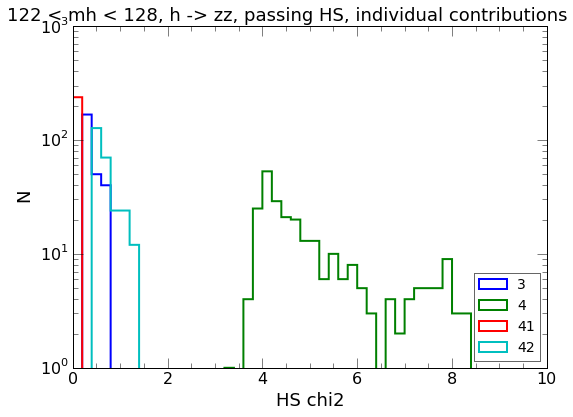

In [88]:

query_str = '122<mh1<128'

chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('ZZ')].Number.values

fig, ax = generate_fig_axes()

for chan in chan_nums:
    xvar = 'HS_%d_chi2' % chan
    _ = plot_histogram(ax=ax, df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                       var=xvar, bins=50, range=[0,10], errorbars=False, label='%d' % chan, linewidth=2, histtype='step')
plt.yscale('log')
plt.xlabel('HS chi2')
    
plt.legend(loc=4, fontsize=14)
plt.suptitle('122 < mh < 128, h -> zz, passing HS, individual contributions')

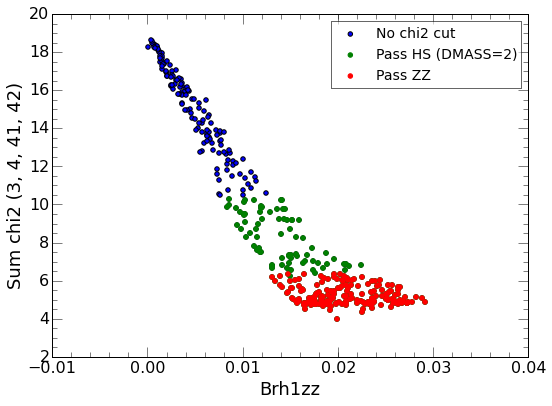

In [59]:

query_str = '122<mh1<128'

xvar = 'Brh1zz'
chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('ZZ')].Number.values
df_q = df_pass_all_ma1.query(query_str)

plot_scatter(yarray=(df_q.HS_3_chi2+df_q.HS_4_chi2 + df_q.HS_41_chi2+df_q.HS_42_chi2).values, 
             xarray=df_q.Brh1zz.values, label='No chi2 cut')
df_q = df_q[df_q.HSprob>0.05]
plot_scatter(ax=plt.gca(), yarray=(df_q.HS_3_chi2+df_q.HS_4_chi2 + df_q.HS_41_chi2+df_q.HS_42_chi2).values, 
             xarray=df_q.Brh1zz.values, label='Pass HS (DMASS=2)', color='green')

df_q = df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str)
plot_scatter(ax=plt.gca(), yarray=(df_q.HS_3_chi2+df_q.HS_4_chi2 + df_q.HS_41_chi2+df_q.HS_42_chi2).values, 
             xarray=df_q.Brh1zz.values, label='Pass ZZ', color='red')
plt.xlabel('Brh1zz')
plt.ylabel('Sum chi2 (3, 4, 41, 42)')
plt.legend(loc=0, fontsize=14)
#     desc = df_HS_peaks[HS_mask].description.values[0]
#     plt.suptitle('122 < mh1 < 128, ma1 < 10.5, analysis %d, %s' % (chan, desc), fontsize=12)

#     set_major_tick_interval('X', 0.01)

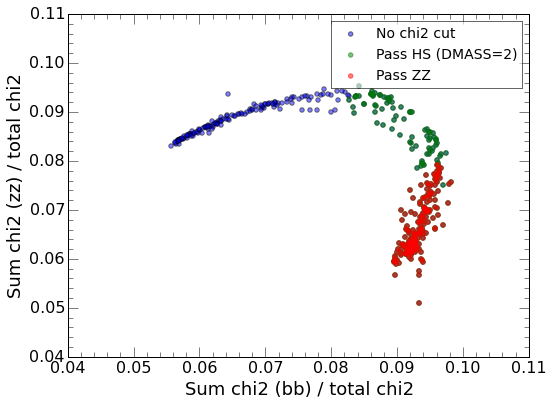

In [119]:

query_str = '122<mh1<128'

xvar = 'Brh1zz'

zz_chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('ZZ')].Number.values
zz_cols = ['HS_%d_chi2' % x for x in zz_chan_nums]

bb_chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('bb')].Number.values
bb_cols = ['HS_%d_chi2' % x for x in bb_chan_nums]

gamgam_chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('gammagamma')].Number.values
gamgam_cols = ['HS_%d_chi2' % x for x in gamgam_chan_nums]

df_q = df_pass_all_ma1.query(query_str)

plot_scatter(yarray=(df_q[zz_cols].sum(axis=1)/df_q.HSchi2).values, 
             xarray=(df_q[bb_cols].sum(axis=1)/df_q.HSchi2).values, label='No chi2 cut',
             alpha=0.5)

df_q = df_q[df_q.HSprob>0.05]
plot_scatter(ax=plt.gca(), yarray=(df_q[zz_cols].sum(axis=1)/df_q.HSchi2).values, 
             xarray=(df_q[bb_cols].sum(axis=1)/df_q.HSchi2).values, label='Pass HS (DMASS=2)', color='green',
             alpha=0.5)

df_q = df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str)
plot_scatter(ax=plt.gca(), yarray=(df_q[zz_cols].sum(axis=1)/df_q.HSchi2).values, 
             xarray=(df_q[bb_cols].sum(axis=1)/df_q.HSchi2).values, label='Pass ZZ', color='red',
             alpha=0.5)

plt.xlabel('Sum chi2 (bb) / total chi2')
plt.ylabel('Sum chi2 (zz) / total chi2')
plt.legend(loc=0, fontsize=14)

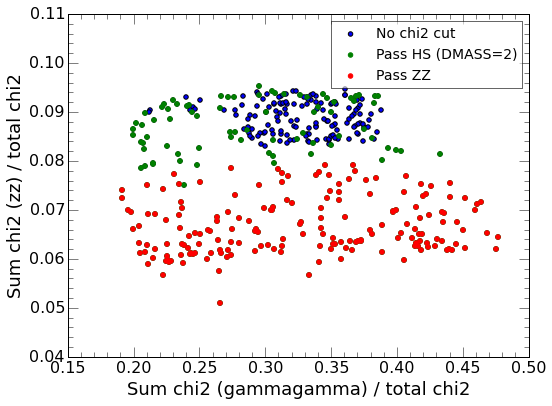

In [61]:

query_str = '122<mh1<128'

xvar = 'Brh1zz'

zz_chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('ZZ')].Number.values
zz_cols = ['HS_%d_chi2' % x for x in zz_chan_nums]

bb_chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('bb')].Number.values
bb_cols = ['HS_%d_chi2' % x for x in bb_chan_nums]

gamgam_chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('gammagamma')].Number.values
gamgam_cols = ['HS_%d_chi2' % x for x in gamgam_chan_nums]

df_q = df_pass_all_ma1.query(query_str)

plot_scatter(yarray=(df_q[zz_cols].sum(axis=1)/df_q.HSchi2).values, 
             xarray=(df_q[gamgam_cols].sum(axis=1)/df_q.HSchi2).values, label='No chi2 cut')

df_q = df_q[df_q.HSprob>0.05]
plot_scatter(ax=plt.gca(), yarray=(df_q[zz_cols].sum(axis=1)/df_q.HSchi2).values, 
             xarray=(df_q[gamgam_cols].sum(axis=1)/df_q.HSchi2).values, label='Pass HS (DMASS=2)', color='green')

df_q = df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str)
plot_scatter(ax=plt.gca(), yarray=(df_q[zz_cols].sum(axis=1)/df_q.HSchi2).values, 
             xarray=(df_q[gamgam_cols].sum(axis=1)/df_q.HSchi2).values, label='Pass ZZ', color='red')

plt.xlabel('Sum chi2 (gammagamma) / total chi2')
plt.ylabel('Sum chi2 (zz) / total chi2')
plt.legend(loc=0, fontsize=14)

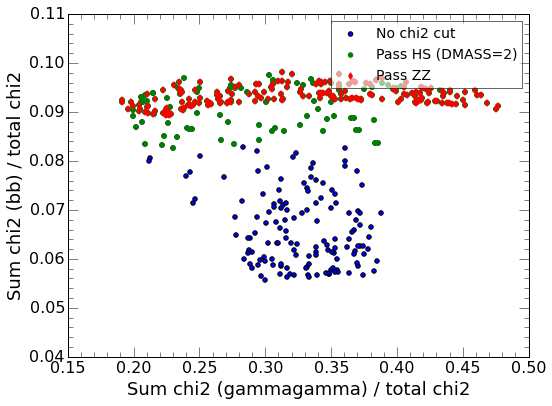

In [120]:

query_str = '122<mh1<128'

xvar = 'Brh1zz'

zz_chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('ZZ')].Number.values
zz_cols = ['HS_%d_chi2' % x for x in zz_chan_nums]

bb_chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('bb')].Number.values
bb_cols = ['HS_%d_chi2' % x for x in bb_chan_nums]

gamgam_chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('gammagamma')].Number.values
gamgam_cols = ['HS_%d_chi2' % x for x in gamgam_chan_nums]

df_q = df_pass_all_ma1.query(query_str)

plot_scatter(yarray=(df_q[bb_cols].sum(axis=1)/df_q.HSchi2).values, 
             xarray=(df_q[gamgam_cols].sum(axis=1)/df_q.HSchi2).values, label='No chi2 cut')

df_q = df_q[df_q.HSprob>0.05]
plot_scatter(ax=plt.gca(), yarray=(df_q[bb_cols].sum(axis=1)/df_q.HSchi2).values, 
             xarray=(df_q[gamgam_cols].sum(axis=1)/df_q.HSchi2).values, label='Pass HS (DMASS=2)', color='green')

df_q = df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str)
plot_scatter(ax=plt.gca(), yarray=(df_q[bb_cols].sum(axis=1)/df_q.HSchi2).values, 
             xarray=(df_q[gamgam_cols].sum(axis=1)/df_q.HSchi2).values, label='Pass ZZ', color='red', marker='d')

plt.xlabel('Sum chi2 (gammagamma) / total chi2')
plt.ylabel('Sum chi2 (bb) / total chi2')
plt.legend(loc=0, fontsize=14)

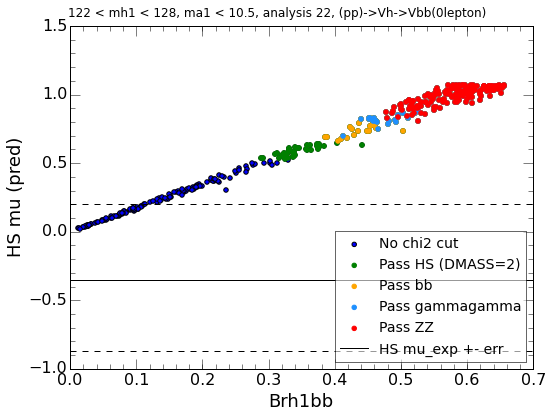

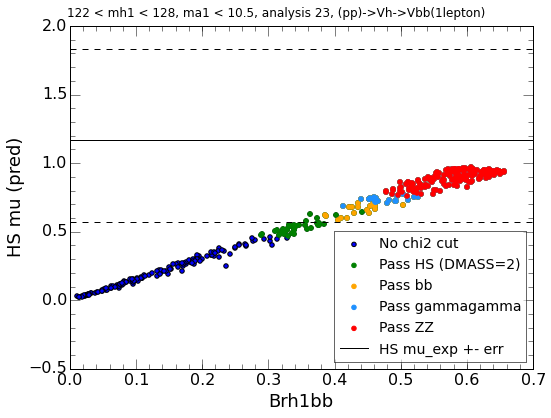

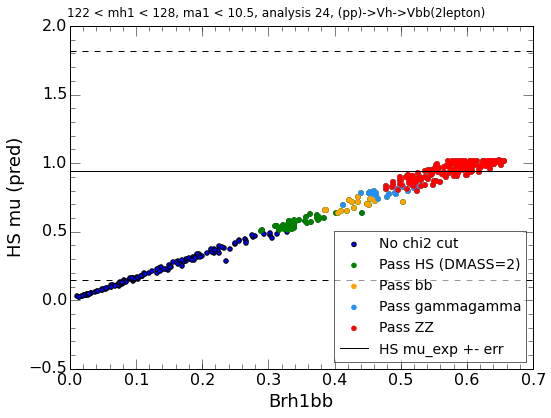

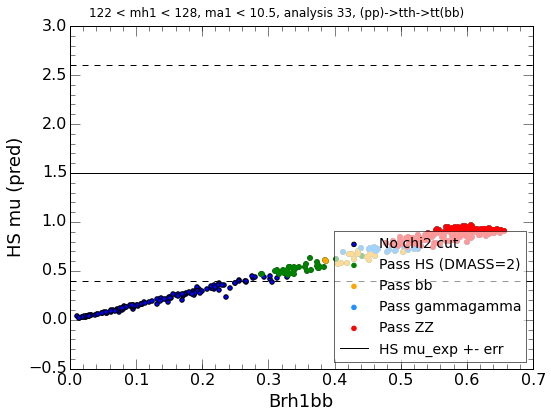

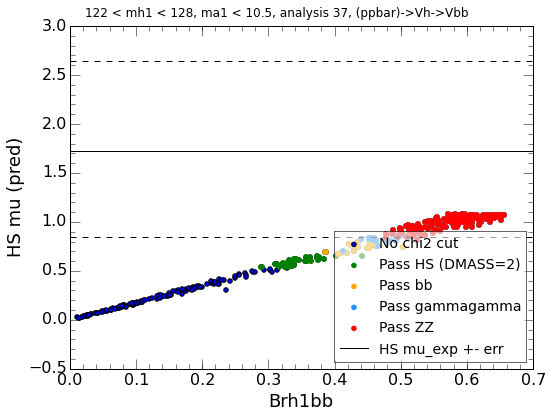

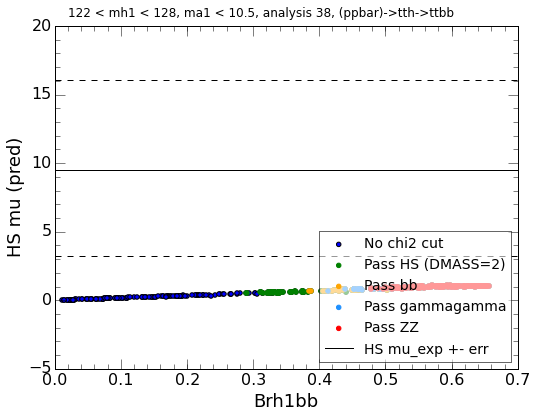

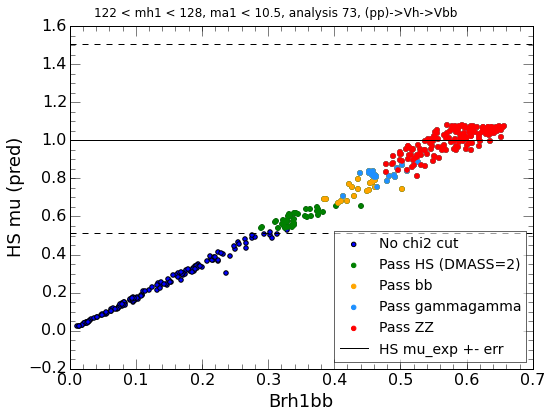

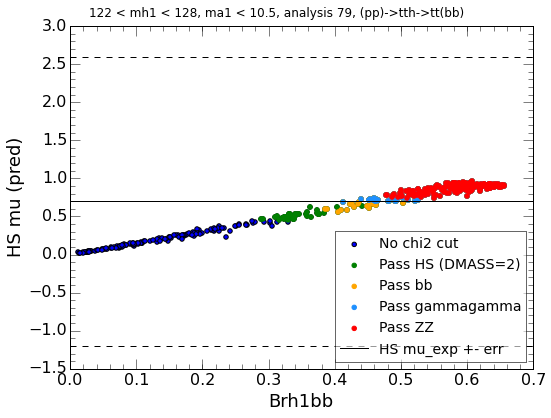

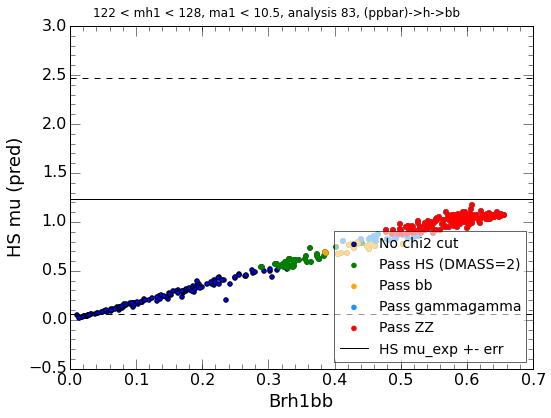

In [63]:

query_str = '122<mh1<128'

xvar = 'Brh1bb'
chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('bb')].Number.values

for chan in chan_nums:
    yvar = 'HS_%d_muPred' % chan
    _ = plot_scatter(df=df_pass_all_ma1.query(query_str), 
                       xvar=xvar, yvar=yvar, label='No chi2 cut')

    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass HS (DMASS=2)', color='green')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass bb', color='orange')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass gammagamma', color='dodgerblue')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass ZZ', color='red')

    plt.xlim(left=0)
    plt.ylabel('HS mu (pred)')
    
    # plot HS mu
    HS_mask = df_HS_peaks.Number == chan
#     print df_HS_peaks[HS_mask]
    mu_obs = df_HS_peaks[HS_mask].mu_obs.values[0]
    dmu_low = df_HS_peaks[HS_mask].dmu_low.values[0]
    dmu_high = df_HS_peaks[HS_mask].dmu_high.values[0]

    xlim = plt.xlim()
    plt.hlines(mu_obs, *xlim, label='HS mu_exp +- err')
    plt.hlines(mu_obs-dmu_low, *xlim, linestyle='dashed')
    plt.hlines(mu_obs+dmu_high, *xlim, linestyle='dashed')
    
    plt.legend(loc=4, fontsize=14)
    desc = df_HS_peaks[HS_mask].description.values[0]
    plt.suptitle('122 < mh1 < 128, ma1 < 10.5, analysis %d, %s' % (chan, desc), fontsize=12)
#     set_major_tick_interval('X', 0.01)

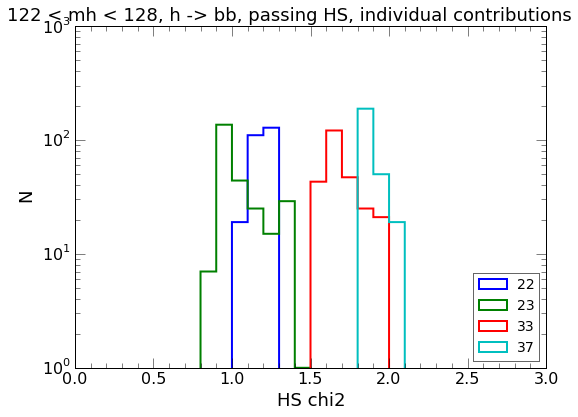

In [121]:

query_str = '122<mh1<128'

chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('bb')].Number.values

fig, ax = generate_fig_axes()

for chan in chan_nums:
    xvar = 'HS_%d_chi2' % chan
    if df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str)[xvar].mean()>1:
        _ = plot_histogram(ax=ax, df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                           var=xvar, bins=30, range=[0,3], errorbars=False, label='%d' % chan, linewidth=2, histtype='step')
plt.yscale('log')
plt.xlabel('HS chi2')
    
plt.legend(loc=4, fontsize=14)
plt.suptitle('122 < mh < 128, h -> bb, passing HS, individual contributions')

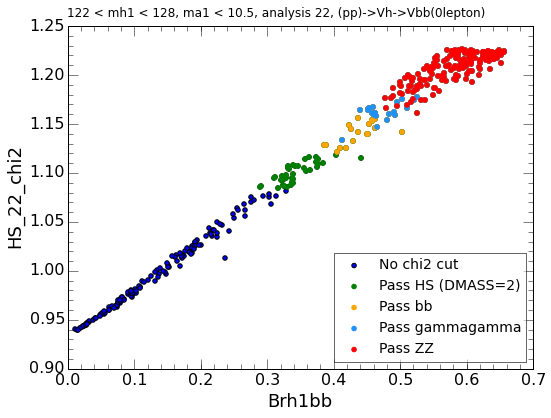

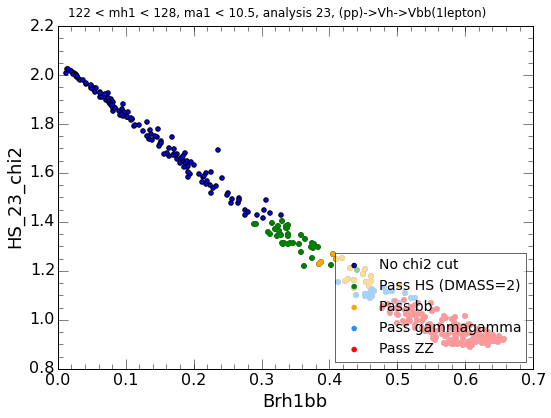

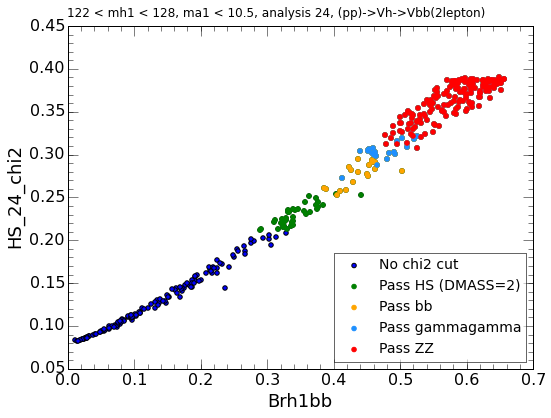

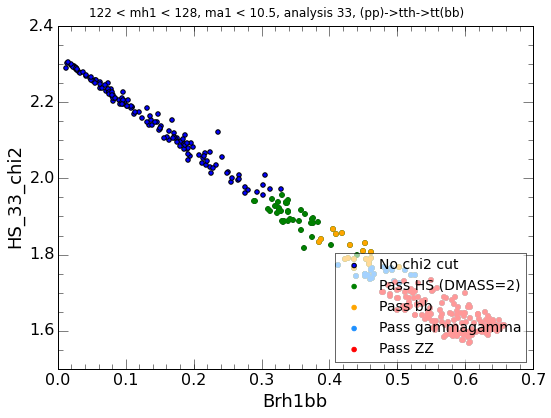

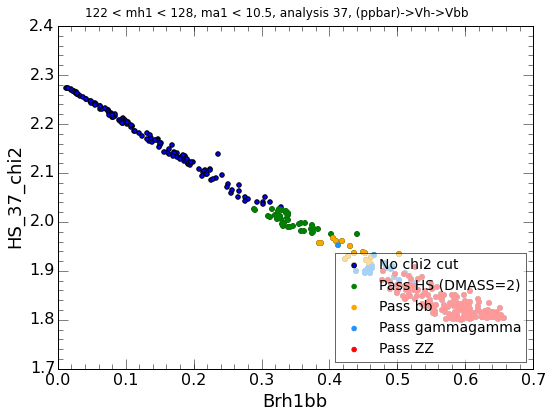

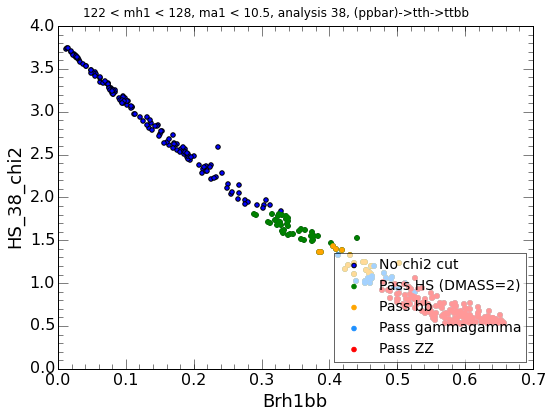

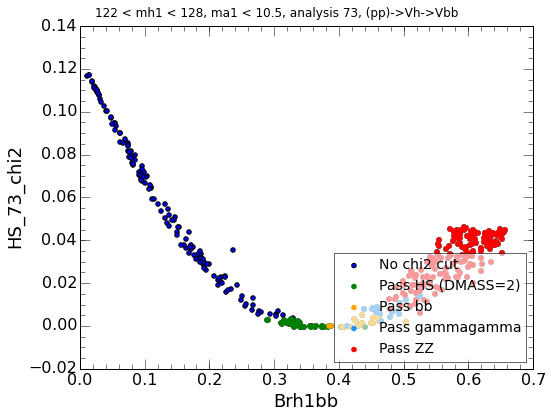

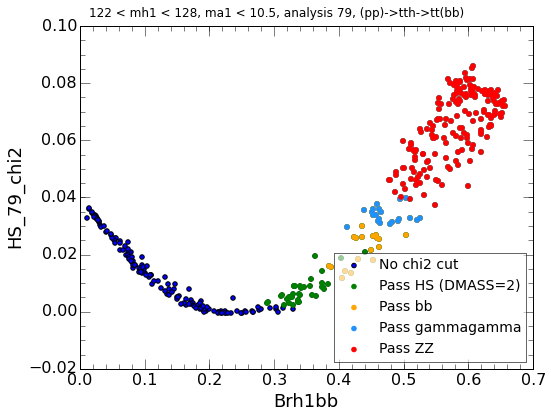

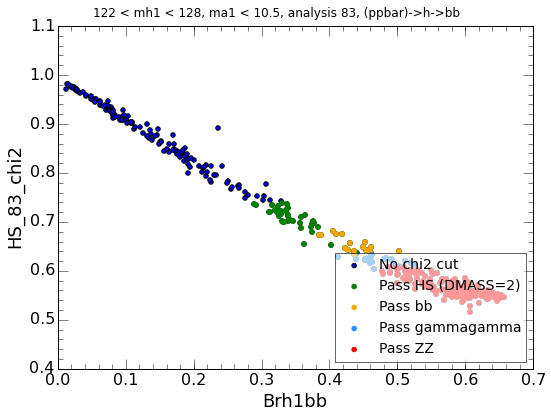

In [64]:

query_str = '122<mh1<128'

xvar = 'Brh1bb'
chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('bb')].Number.values

for chan in chan_nums:
    yvar = 'HS_%d_chi2' % chan
    _ = plot_scatter(df=df_pass_all_ma1.query(query_str), 
                       xvar=xvar, yvar=yvar, label='No chi2 cut')

    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass HS (DMASS=2)', color='green')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass bb', color='orange')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass gammagamma', color='dodgerblue')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass ZZ', color='red')

    plt.xlim(left=0)
#     plt.ylabel('HS mu (pred)')
    
    # plot HS mu
    HS_mask = df_HS_peaks.Number == chan

    plt.legend(loc=4, fontsize=14)
    desc = df_HS_peaks[HS_mask].description.values[0]
    plt.suptitle('122 < mh1 < 128, ma1 < 10.5, analysis %d, %s' % (chan, desc), fontsize=12)
#     set_major_tick_interval('X', 0.01)

/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


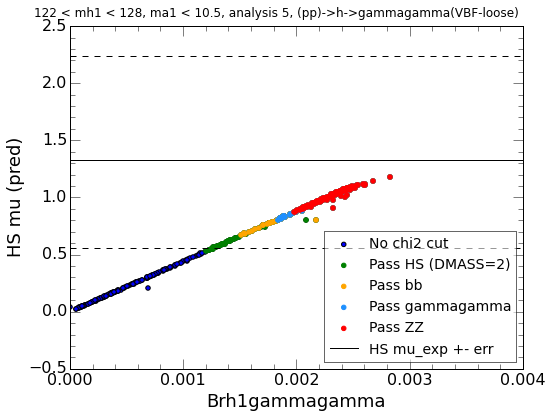

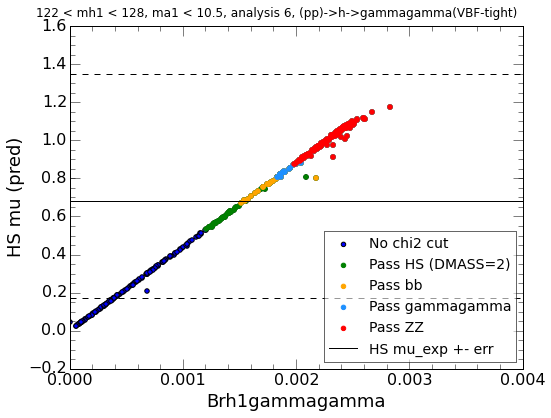

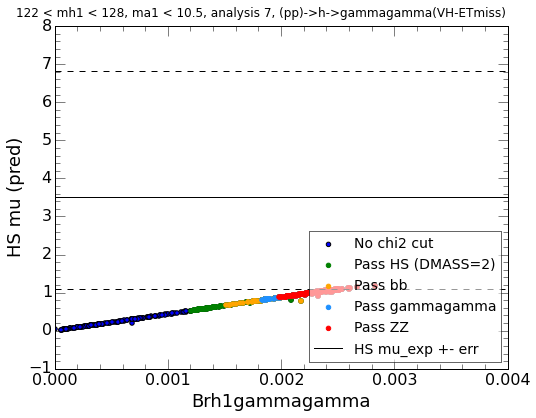

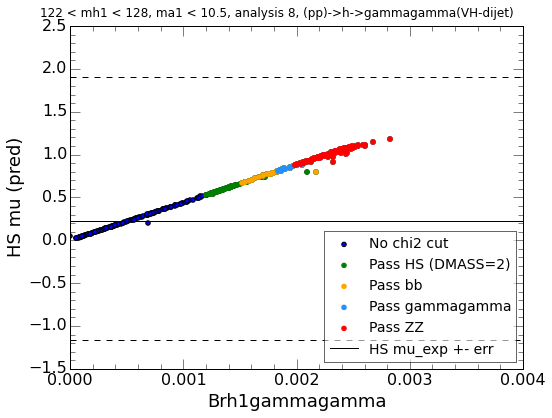

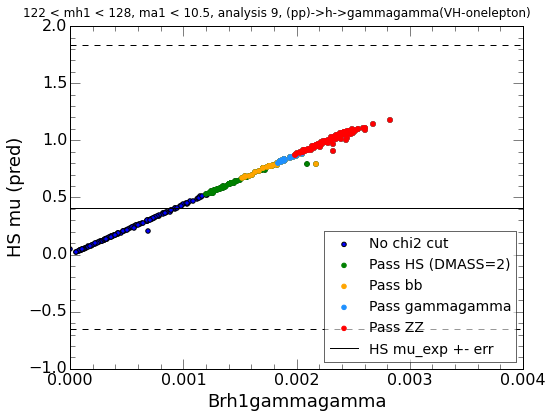

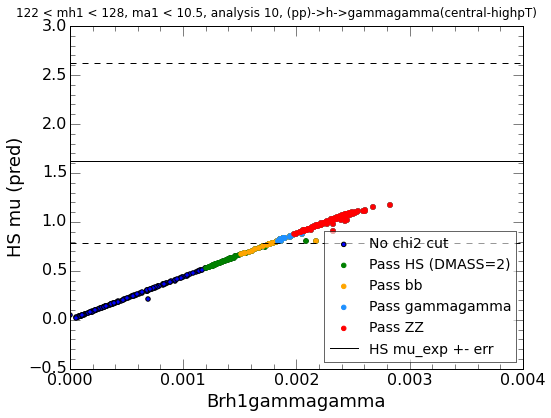

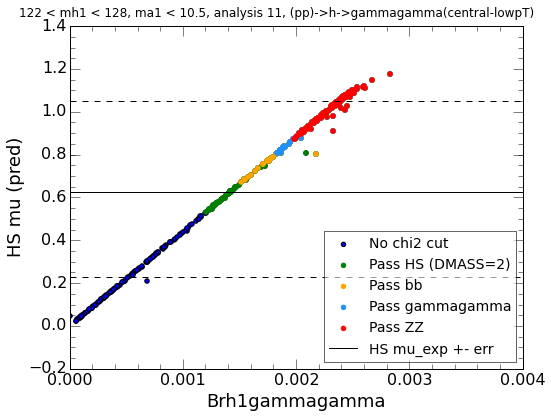

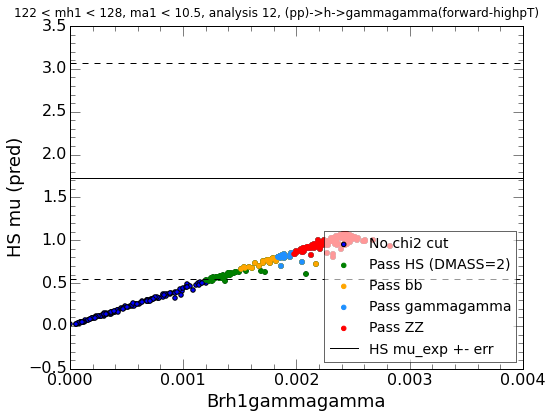

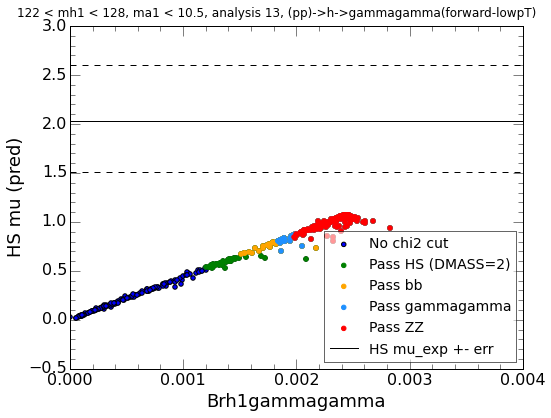

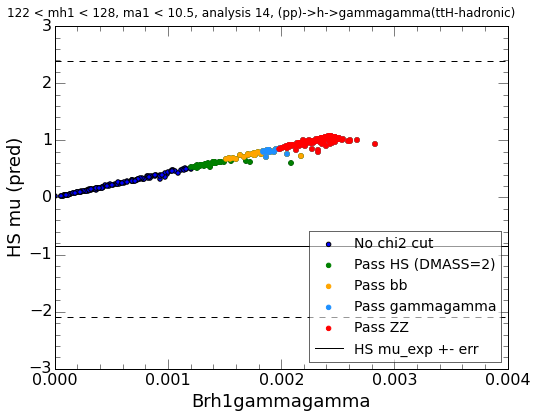

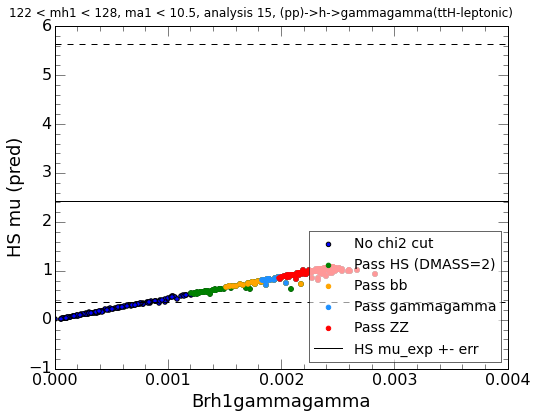

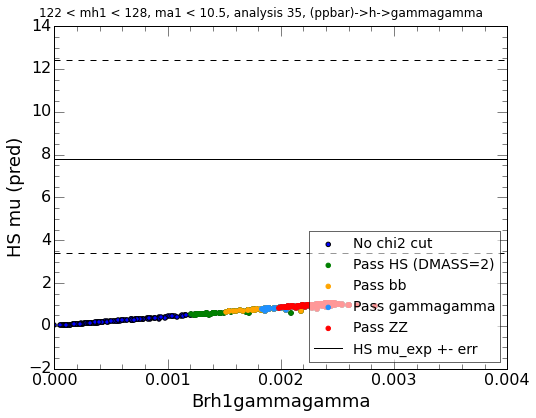

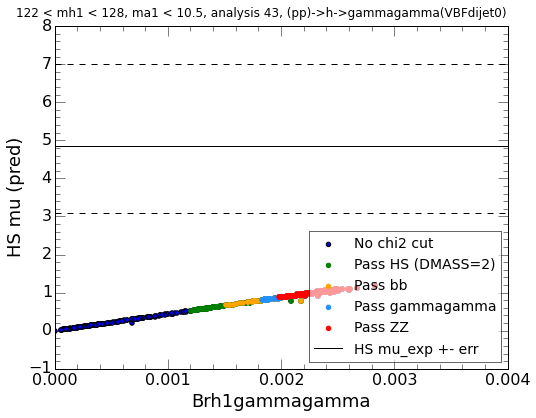

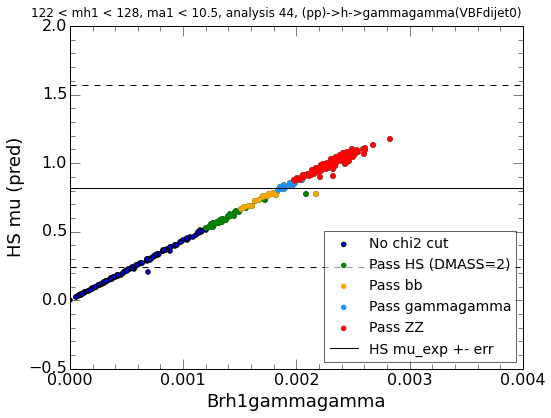

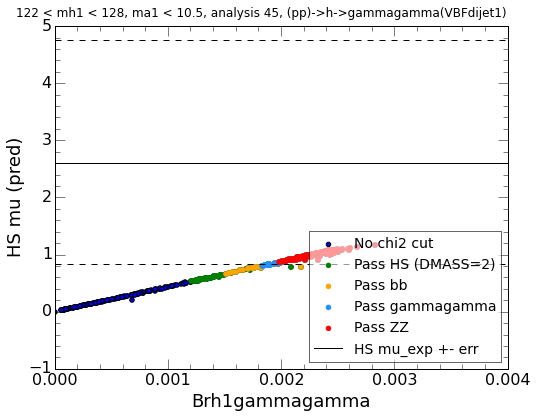

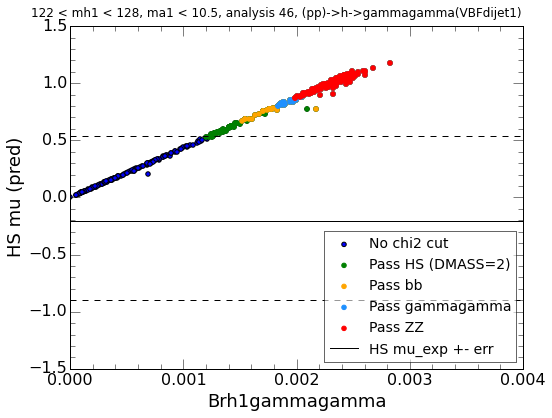

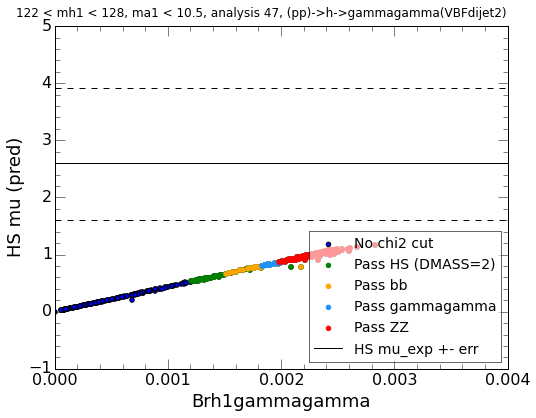

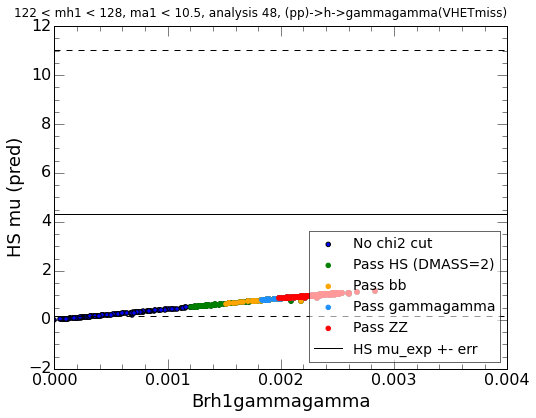

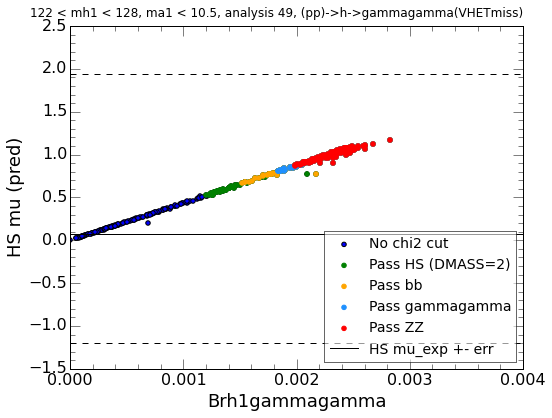

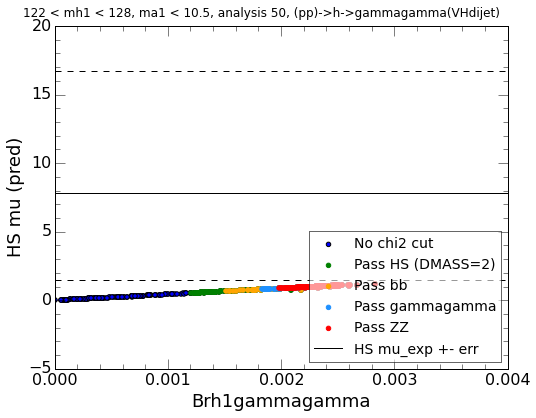

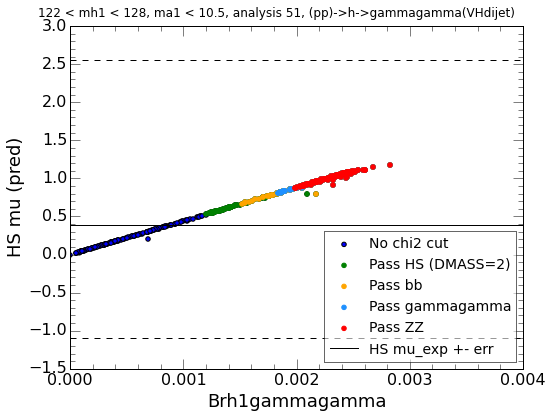

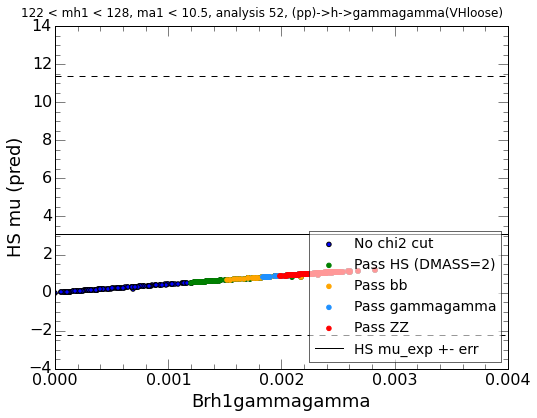

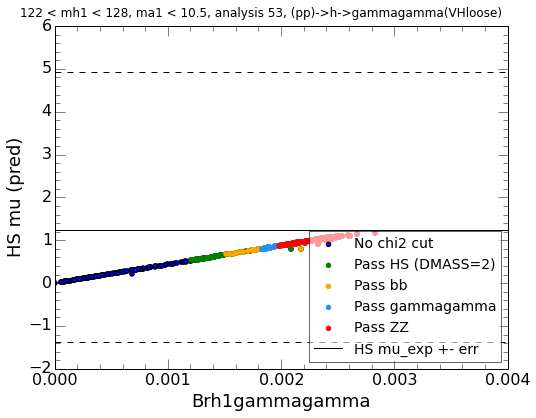

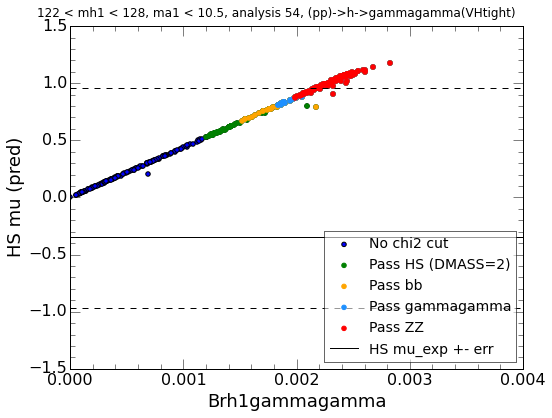

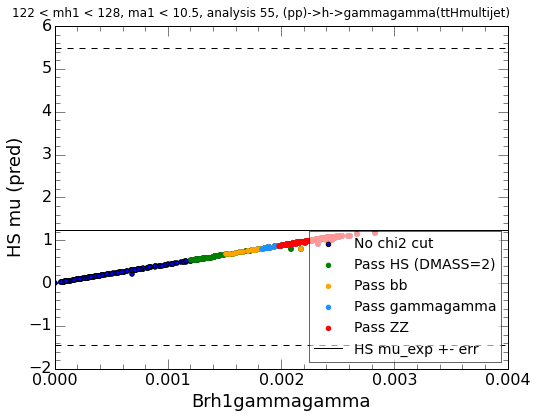

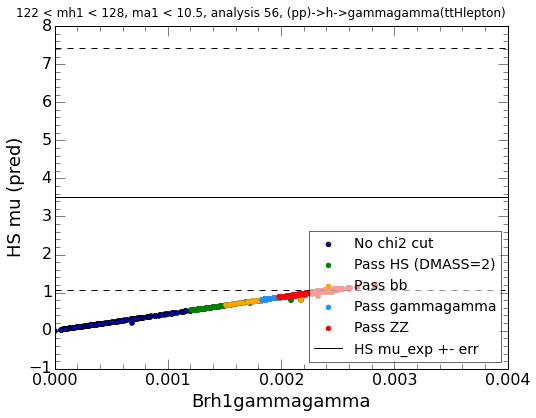

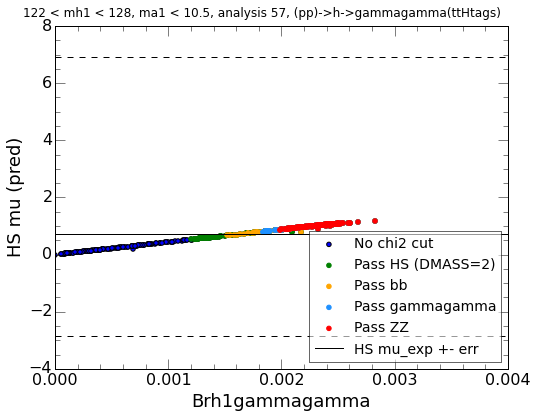

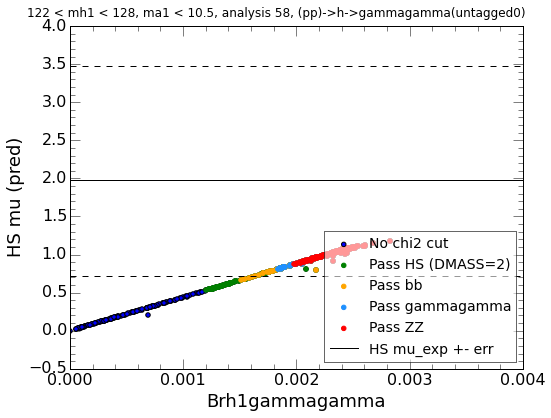

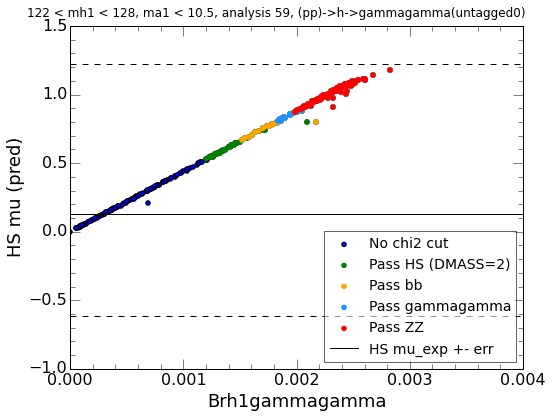

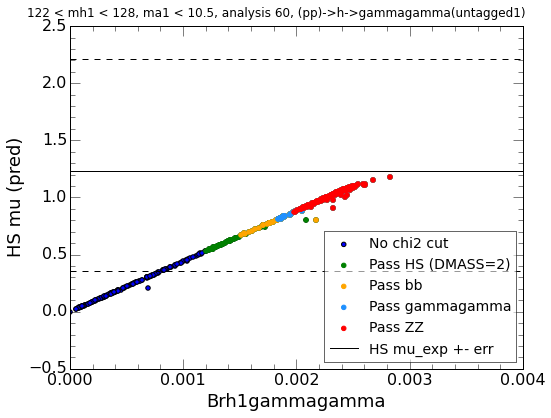

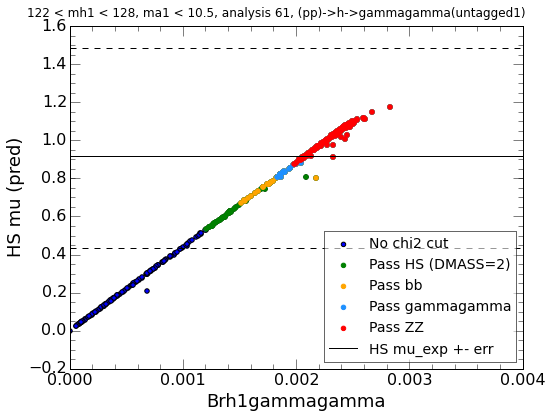

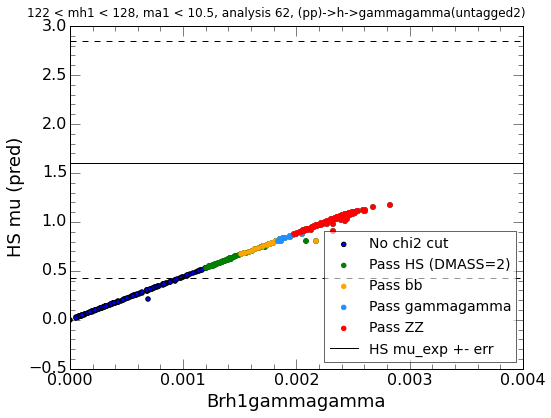

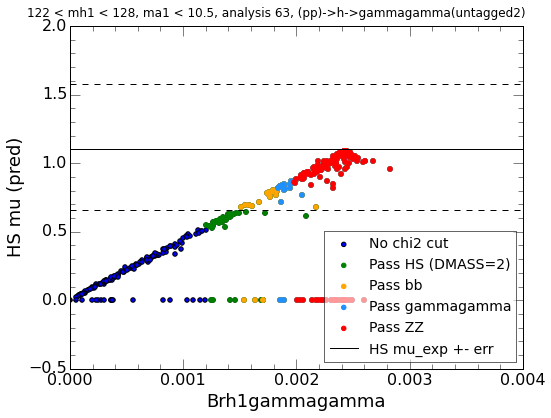

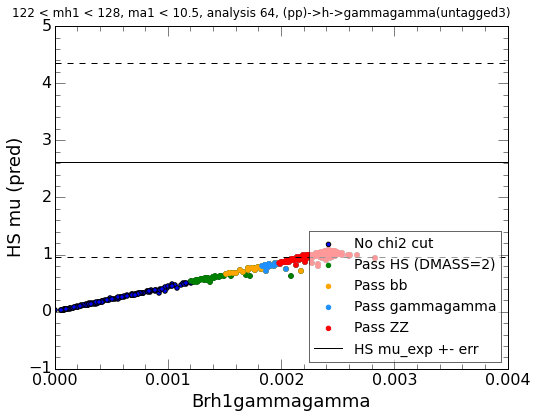

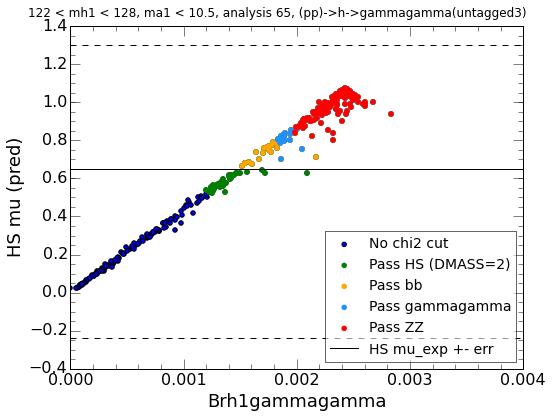

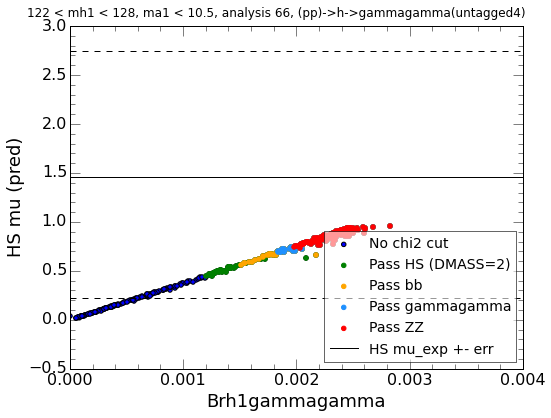

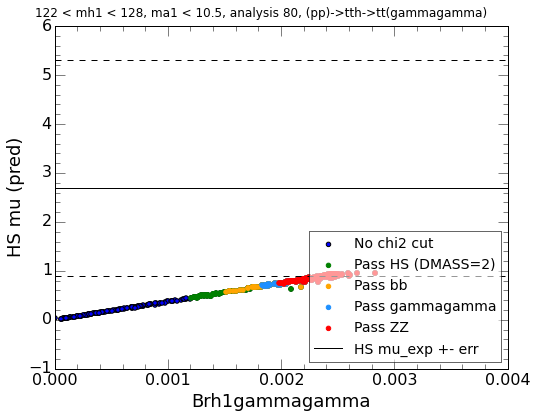

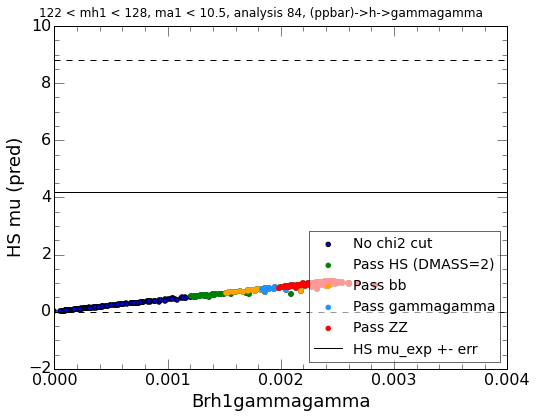

In [65]:

query_str = '122<mh1<128'

xvar = 'Brh1gammagamma'
chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('gammagamma')].Number.values

for chan in chan_nums:
    yvar = 'HS_%d_muPred' % chan
    _ = plot_scatter(df=df_pass_all_ma1.query(query_str), 
                       xvar=xvar, yvar=yvar, label='No chi2 cut')

    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass HS (DMASS=2)', color='green')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass bb', color='orange')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass gammagamma', color='dodgerblue')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass ZZ', color='red')

    plt.xlim(left=0, right=0.004)
    plt.ylabel('HS mu (pred)')
    
    # plot HS mu
    HS_mask = df_HS_peaks.Number == chan
#     print df_HS_peaks[HS_mask]
    mu_obs = df_HS_peaks[HS_mask].mu_obs.values[0]
    dmu_low = df_HS_peaks[HS_mask].dmu_low.values[0]
    dmu_high = df_HS_peaks[HS_mask].dmu_high.values[0]

    xlim = plt.xlim()
    plt.hlines(mu_obs, *xlim, label='HS mu_exp +- err')
    plt.hlines(mu_obs-dmu_low, *xlim, linestyle='dashed')
    plt.hlines(mu_obs+dmu_high, *xlim, linestyle='dashed')
    
    plt.legend(loc=4, fontsize=14)
    desc = df_HS_peaks[HS_mask].description.values[0]
    plt.suptitle('122 < mh1 < 128, ma1 < 10.5, analysis %d, %s' % (chan, desc), fontsize=12)
    set_major_tick_interval('X', 0.001)

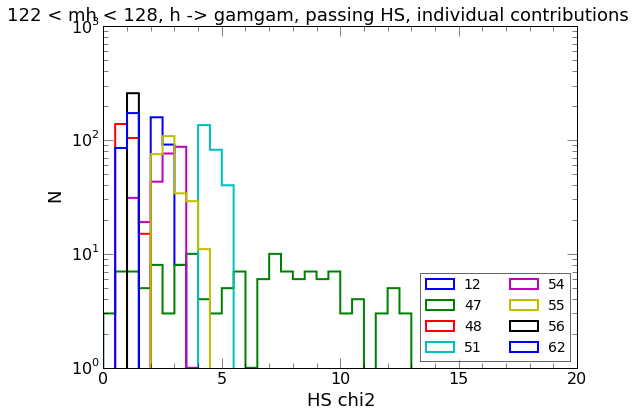

In [118]:

query_str = '122<mh1<128'

chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('gammagamma')].Number.values

fig, ax = generate_fig_axes()

color = cm.rainbow(np.linspace(0,1,len(chan_nums)))

for i, chan in enumerate(chan_nums):
    xvar = 'HS_%d_chi2' % chan
    if (len(df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str)[xvar]) > 0 and 
        df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str)[xvar].mean() > 1):
        _ = plot_histogram(ax=ax, df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str),
                           var=xvar, bins=40, range=[0,20], errorbars=False, label='%d' % chan, 
                           linewidth=2, histtype='step')
plt.yscale('log')
plt.xlabel('HS chi2')
    
plt.legend(loc=4, fontsize=14, ncol=2)
plt.suptitle('122 < mh < 128, h -> gamgam, passing HS, individual contributions')

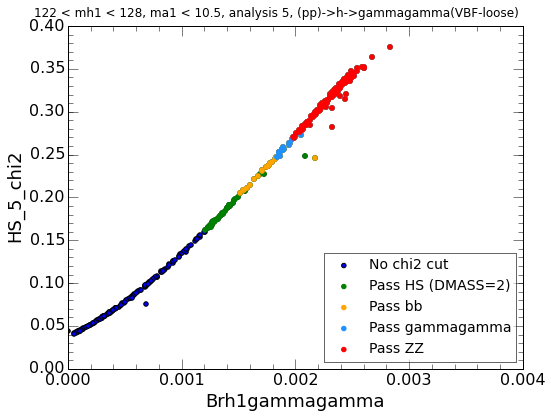

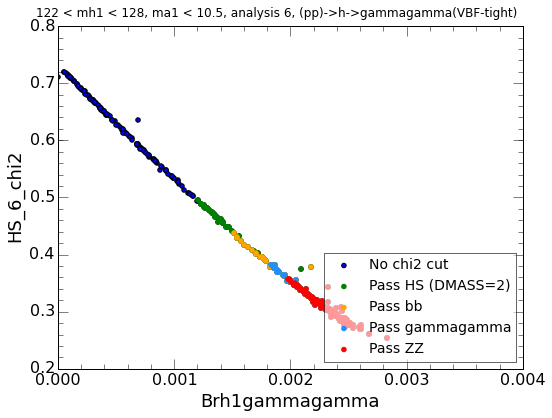

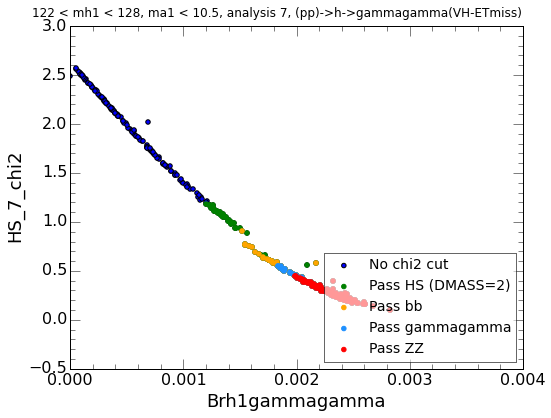

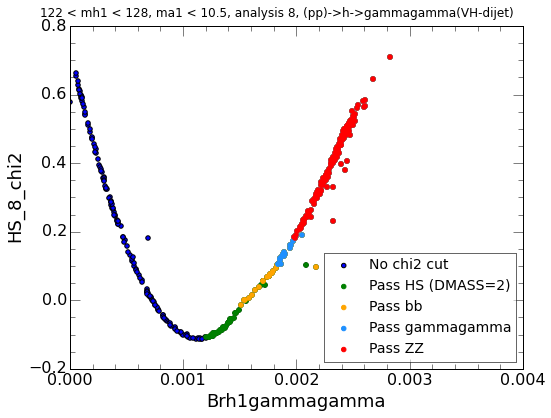

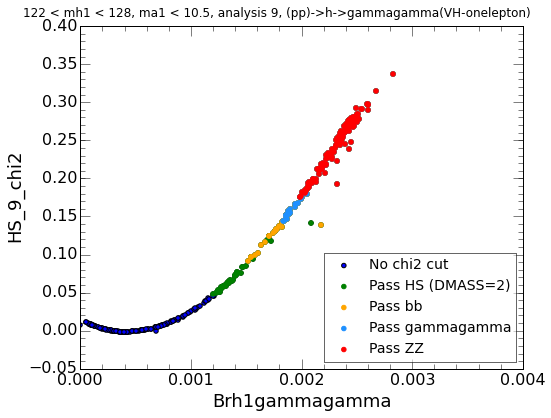

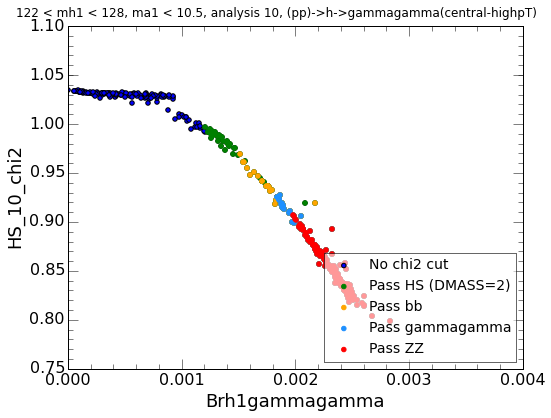

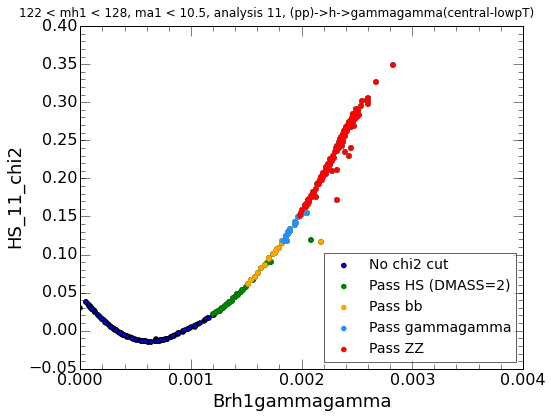

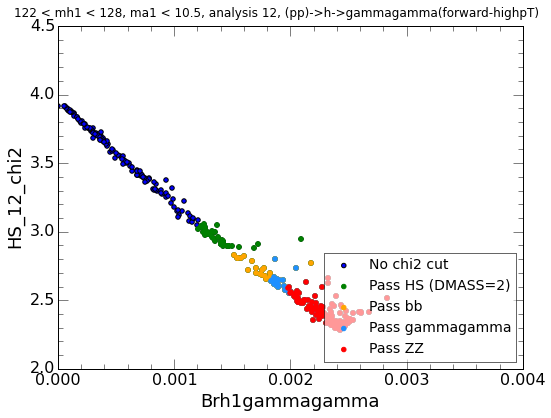

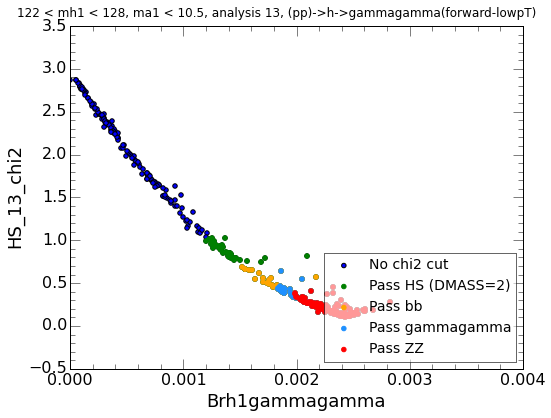

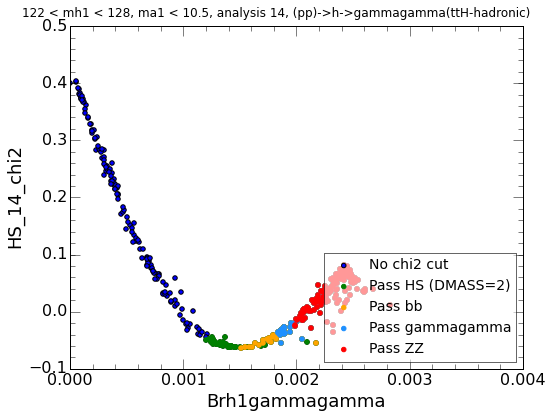

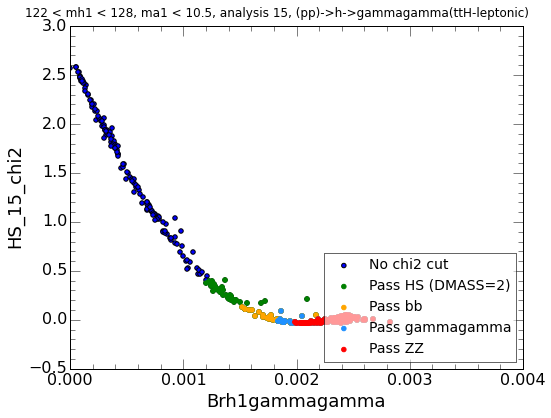

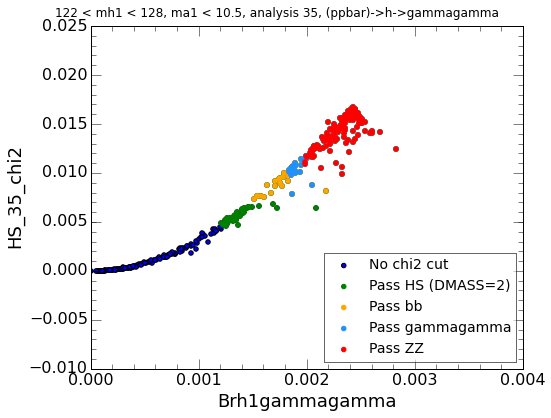

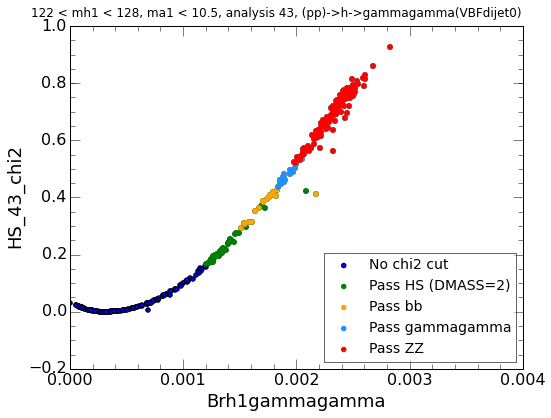

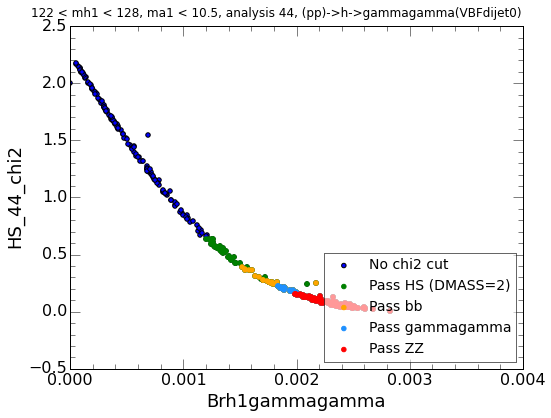

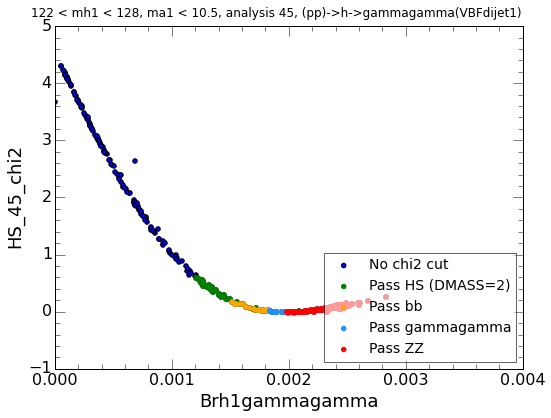

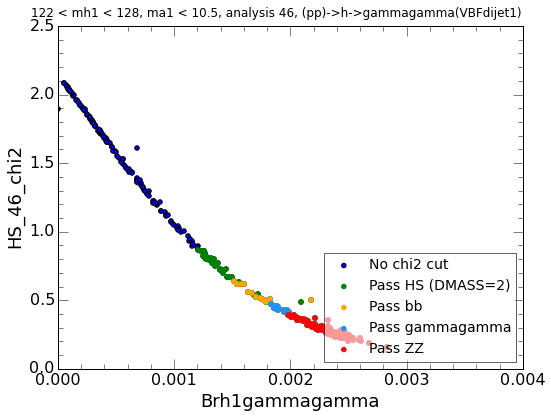

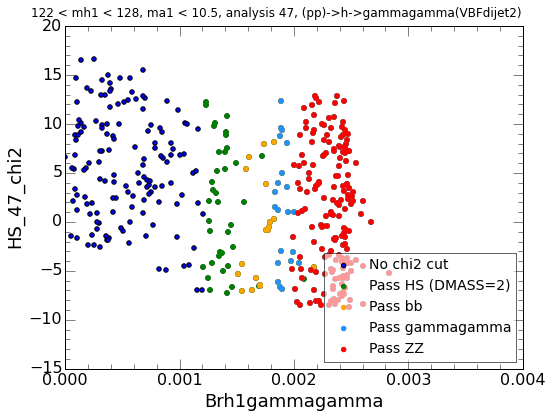

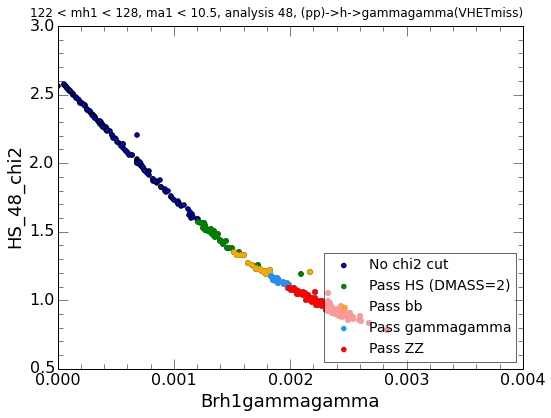

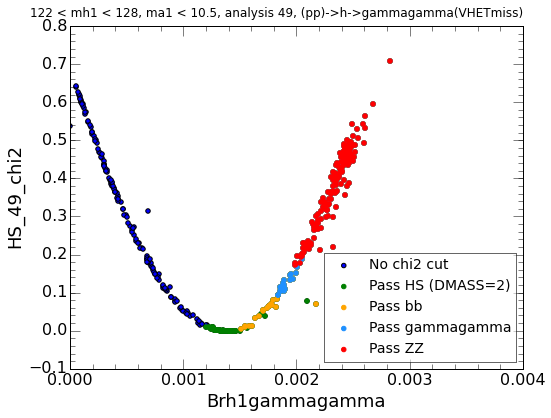

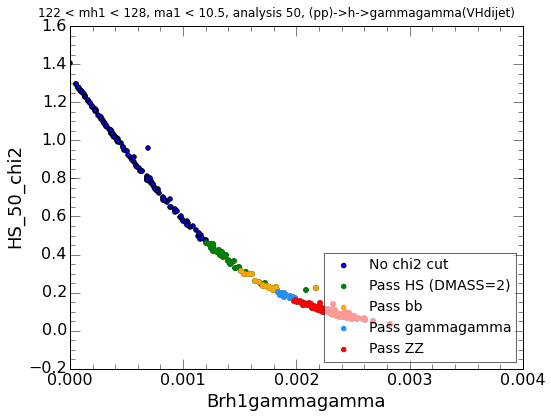

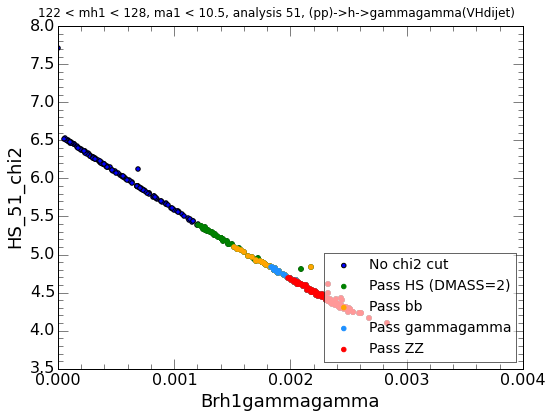

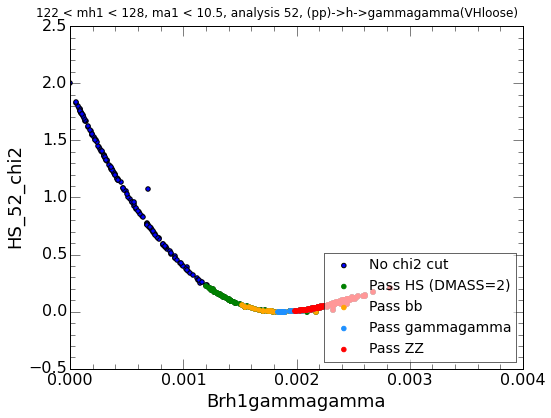

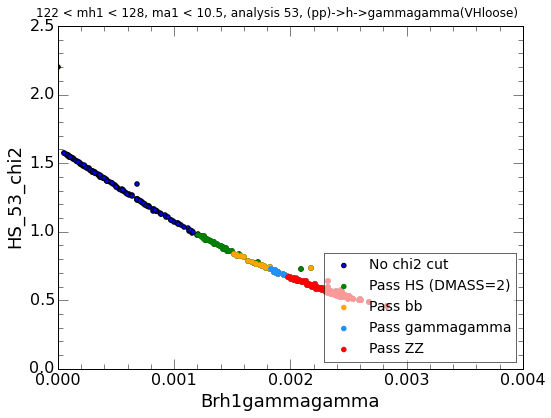

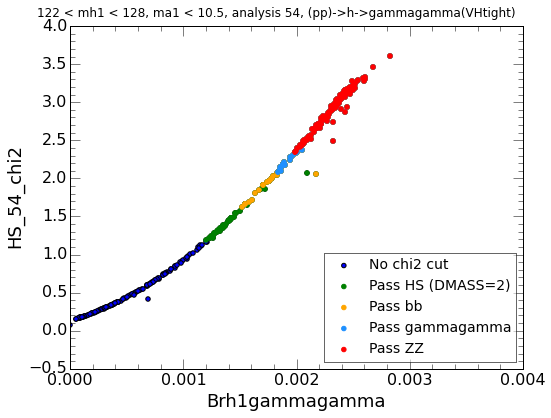

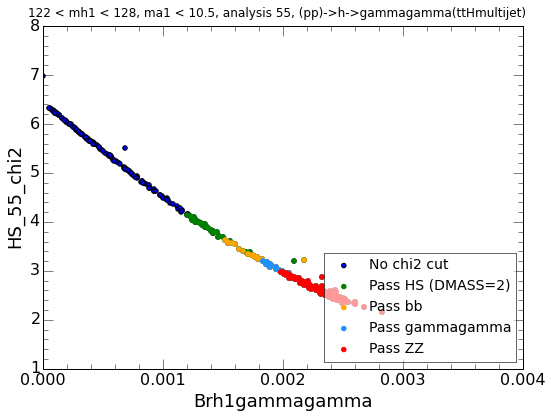

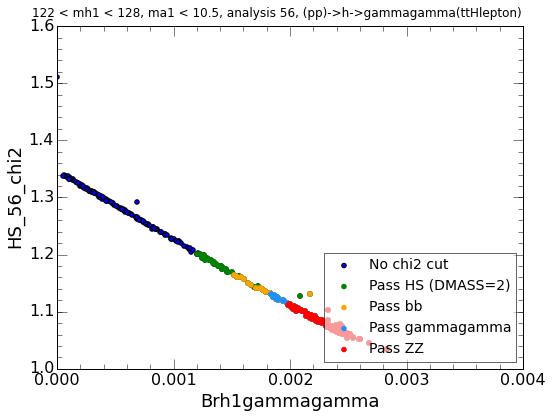

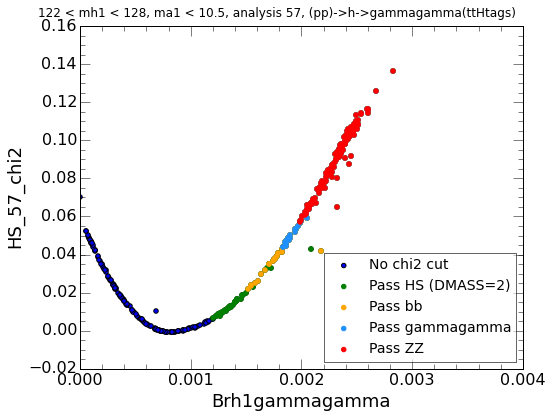

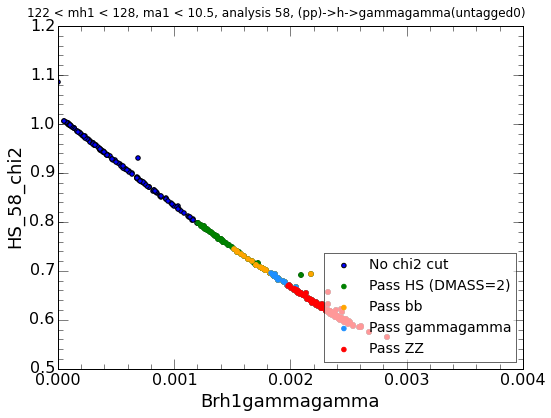

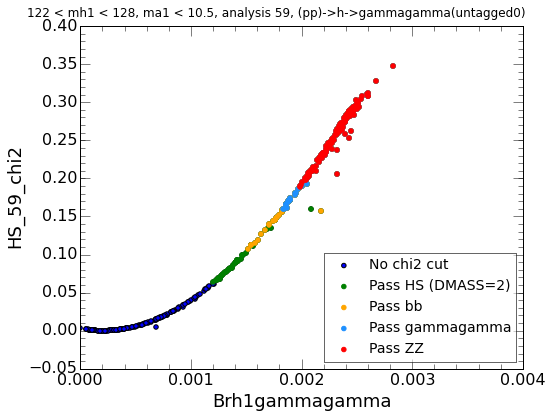

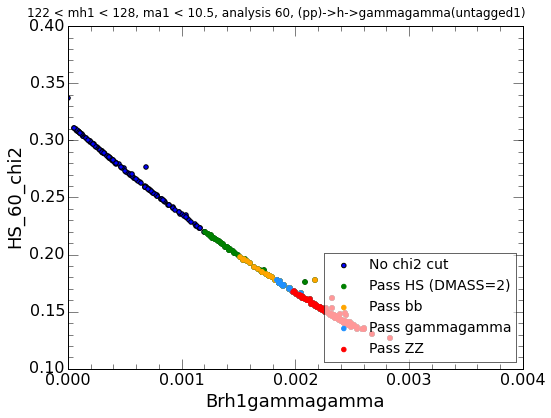

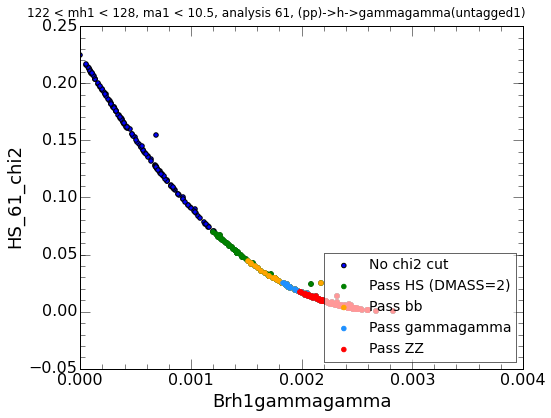

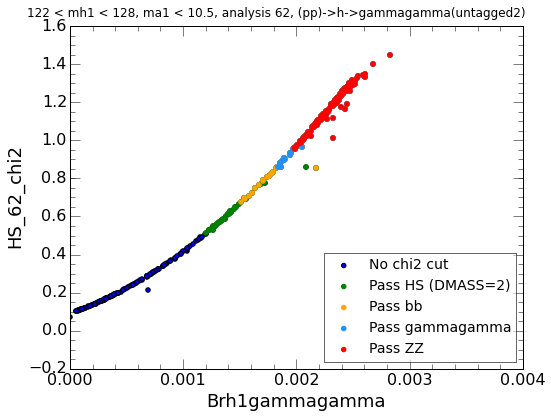

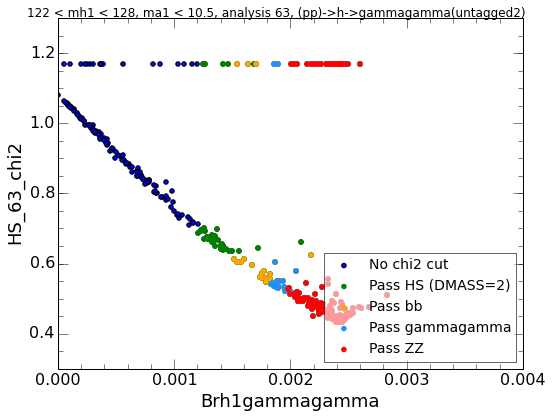

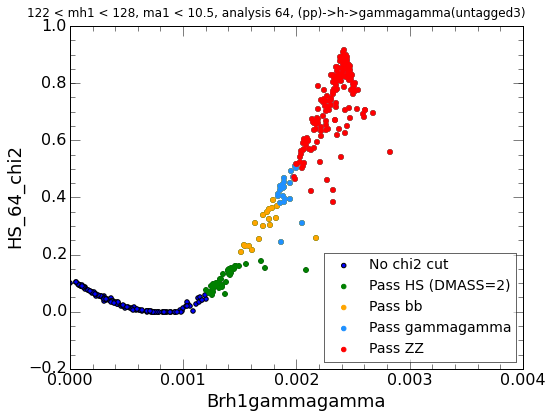

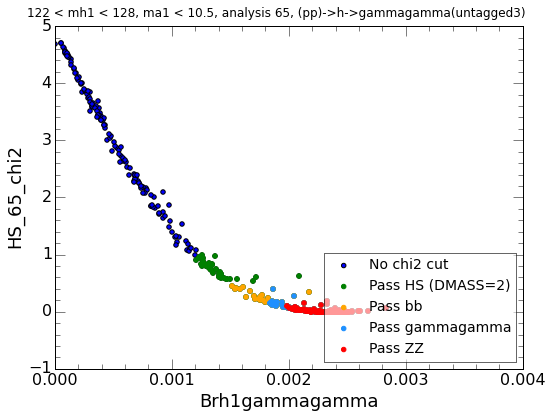

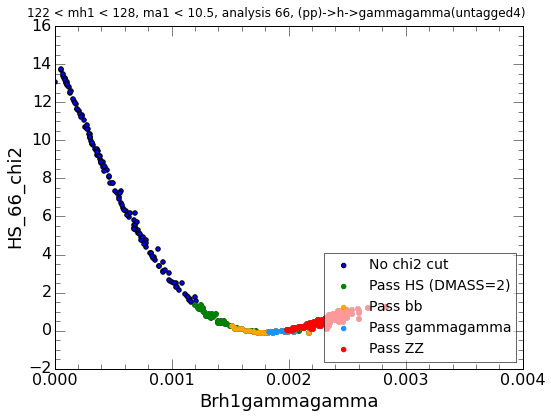

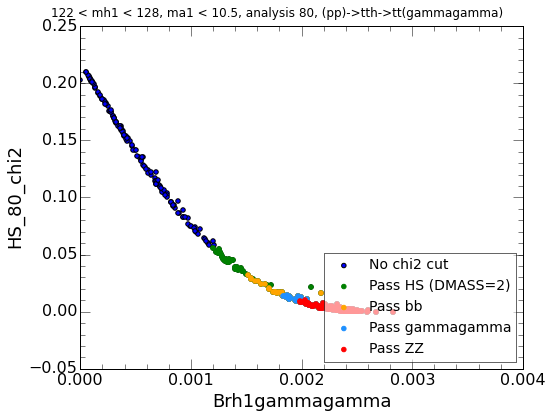

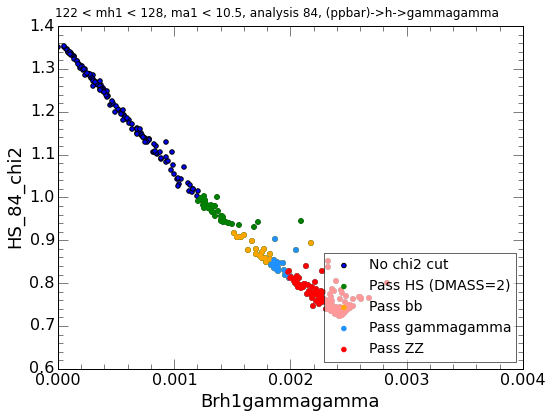

In [66]:

query_str = '122<mh1<128'

xvar = 'Brh1gammagamma'
chan_nums = df_HS_peaks[df_HS_peaks.description.str.contains('gammagamma')].Number.values

for chan in chan_nums:
    yvar = 'HS_%d_chi2' % chan
    _ = plot_scatter(df=df_pass_all_ma1.query(query_str), 
                       xvar=xvar, yvar=yvar, label='No chi2 cut')

    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass HS (DMASS=2)', color='green')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass bb', color='orange')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass gammagamma', color='dodgerblue')
    _ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), 
                       xvar=xvar, yvar=yvar, label='Pass ZZ', color='red')

    plt.xlim(left=0, right=0.004)
#     plt.ylabel('HS mu (pred)')
    
    # plot HS mu
    HS_mask = df_HS_peaks.Number == chan
#     print df_HS_peaks[HS_mask]

    plt.legend(loc=4, fontsize=14)
    desc = df_HS_peaks[HS_mask].description.values[0]
    plt.suptitle('122 < mh1 < 128, ma1 < 10.5, analysis %d, %s' % (chan, desc), fontsize=12)
    set_major_tick_interval('X', 0.001)

In [67]:
HS_mask = df_HS_peaks.description.str.contains('ZZ')
df_HS_peaks[HS_mask]

Number  Analysis-ID  mh_obs  mu_obs  dmu_low  dmu_high  dmh_exp  \
2        3       519103  125.36   0.260    0.940     1.640     2.00   
3        4       519102  124.51   1.660    0.440     0.510     0.52   
40      41      1400901  125.63   0.883    0.272     0.336     0.45   
41      42      1400902  125.00   1.549    0.661     0.953     2.00   

   collaboration  energy  luminosity                   description  \
2            ATL     8.0        25.3  (pp)->h->ZZ->4l(VBF/VH-like)   
3            ATL     8.0        24.8     (pp)->h->ZZ->4l(ggH-like)   
40           CMS     8.0        24.7       (pp)->h->ZZ->4l(0/1jet)   
41           CMS     8.0        24.7         (pp)->h->ZZ->4l(2jet)   

                             reference  
2                      arXiv:1408.5191  
3                      arXiv:1408.5191  
40  CMS-PAS-HIG-14-009,arXiv:1312.5353  
41  CMS-PAS-HIG-14-009,arXiv:1312.5353